
# **モダンロボティクス：理論から実装へ（v2）**  
**Ultimate 統合プレゼン（Jupyter Notebook 版）**

本ノートは、次の資料を根拠として日本語で再編集した**プレゼン最適化ノート**です。  
- `Course_all.txt`（学習ノートの集成）  
- 日本語講演原稿 PDF（モダンロボティクス講演）  
- 2つの既存ノートブック（付録A/B として統合）  

**特長**：  
- 数式は LaTeX で**可読性の高い表記**に統一。  
- **図のタイトル・凡例は日本語**。Matplotlibのみ使用、各図は1枚ずつ。  
- セルに**スライド表示用メタデータ**を付与（`View > Cell Toolbar > Slideshow` で確認）。



## 目次  
1. 配置空間 \(C\)-space と自由度（Grüblerの公式）  
2. 剛体運動：SO(3)/SE(3)、ツイスト  
3. 順運動学（PoE：指数写像の積）  
4. ヤコビアン（速度運動学・静力学の双対）  
5. 逆運動学（解析・数値）  
6. ダイナミクス（RNEA と \(M, C, g\)）  
7. 軌道生成：5次時間スケーリング  
8. 時間最適：bang–bang と現場実装  
9. 動作計画：A*/PRM/RRT/最適化  
10. 制御：タスク空間 PI と計算トルク  
11. 把持とマニピュレーション（力閉包・摩擦円錐）  
12. 移動ロボット：非ホロ／全方向と youBot  
13. Capstone 統合（8セグメント）  
14. まとめ  
15. 付録A：既存ノート1（統合）  
16. 付録B：既存ノート2（統合）  
17. 付録C：Course_all.txt 抜粋  



## 1. 配置空間 \(C\)-space と自由度（Grüblerの公式）
**配置**＝機構を一意に定める最小パラメータ集合。全ての配置の集合が **\(C\)-space**。  
剛体の DoF は平面で 3、空間で 6。多体系では **Grübler の公式**：
\[
\mathrm{DoF} = m\,(N-1-J) + \sum_{i=1}^{J} f_i, \quad (m=3\ \text{or}\ 6)
\]
例：平面2Rの \(C\)-space\ は \(\mathbb{S}^1\times \mathbb{S}^1\)（トーラス）。**直線**の関節空間経路でも、作業空間軌跡は**曲線**になり得る。



## 2. 剛体運動：SO(3)/SE(3)、ツイスト
回転は \(\mathrm{SO}(3)\) の行列 \(R\)、剛体姿勢は \(\mathrm{SE}(3)\) の同次変換
\[
T=\begin{bmatrix}R & p\\ 0 & 1\end{bmatrix}
\]
瞬時運動は **ツイスト** \(\mathbf{V}=(\boldsymbol{\omega},\mathbf{v})\in\mathbb{R}^6\)。指数写像：
\[
R=\exp([\hat\omega]\theta),\qquad T=\exp([\mathcal S]\theta).
\]



## 3. 順運動学（PoE：指数写像の積）
**Product of Exponentials (PoE)** により、関節角 \(\boldsymbol{\theta}\) から末端姿勢
\[
T(\boldsymbol{\theta})=\exp([S_1]\theta_1)\cdots\exp([S_n]\theta_n)\,M
\]
を一行で表現。D–H に比べ、座標系設計の負担・特異性の悩みが減り、速度・力・動力学に自然接続。



## 4. ヤコビアン：速度運動学と静力学（双対）
速度：\(\mathbf{V}=J(\boldsymbol{\theta})\,\dot{\boldsymbol{\theta}}\)。  
静力：\(\boldsymbol{\tau}=J^\top(\boldsymbol{\theta})\,\mathbf{F}\)。  
**特異姿勢**では \(\operatorname{rank}J\) 低下により動けない方向が生まれ、同方向に対する**力利得**は増大（双対性）。



## 5. 逆運動学（IK）
解析IK（構造依存）と数値IK（一般形）。Newton–Raphson 更新：
\[
\boldsymbol{\theta}_{k+1}=\boldsymbol{\theta}_{k}+J^\dagger(\boldsymbol{\theta}_k)\,\mathbf{e}_k.
\]
冗長系では null 空間で制約回避・姿勢最適化。減衰最小二乗で特異近傍を安定化。



## 6. ダイナミクス（RNEA と \(M, C, g\)）
標準形：
\[
\boldsymbol{\tau}=M(\boldsymbol{\theta})\,\ddot{\boldsymbol{\theta}}+C(\boldsymbol{\theta},\dot{\boldsymbol{\theta}})\,\dot{\boldsymbol{\theta}}+\mathbf{g}(\boldsymbol{\theta}).
\]
**再帰的Newton–Euler（RNEA）**は前進（速度・加速度）→後退（力・トルク）で \(O(n)\)。



## 7. 軌道生成：5次時間スケーリング
休止→休止の基本：**5次多項式（S字）**。  
\[
s(t)=10\left(\frac{t}{T}\right)^3-15\left(\frac{t}{T}\right)^4+6\left(\frac{t}{T}\right)^5.
\]
以下で位置・速度・加速度を図示（**日本語タイトル・凡例**）。


/root/miniconda3/envs/modern_robotics/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 7777 (\N{LATIN SMALL LETTER S WITH DOT ABOVE}) missing from font(s) IPAexGothic.
  func(*args, **kwargs)


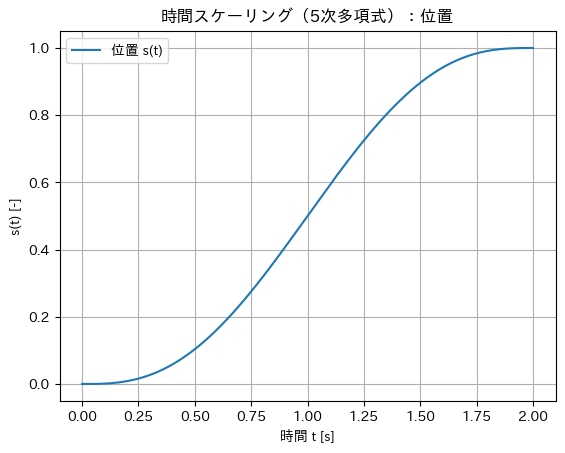

/root/miniconda3/envs/modern_robotics/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 7777 (\N{LATIN SMALL LETTER S WITH DOT ABOVE}) missing from font(s) IPAexGothic.
  fig.canvas.print_figure(bytes_io, **kw)


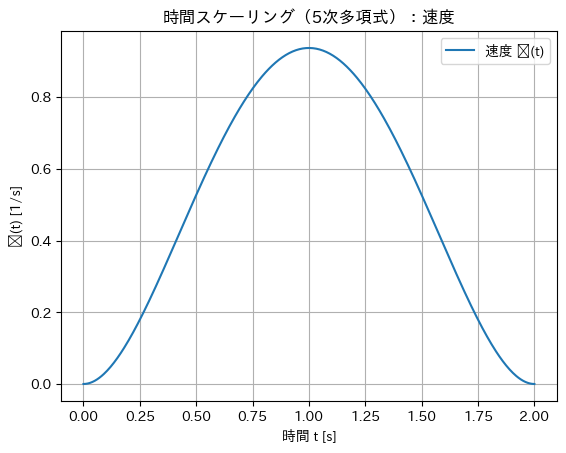

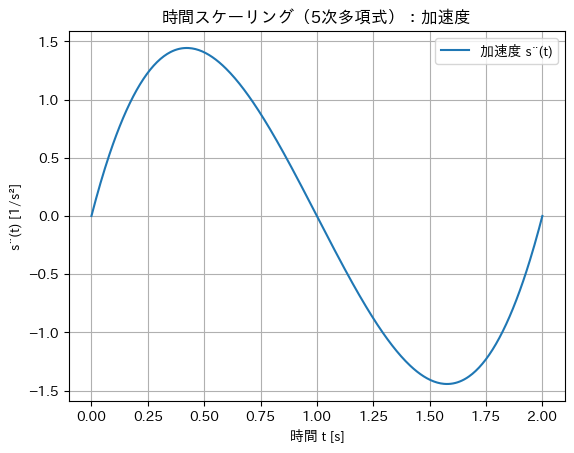

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib  # Japanese font support for matplotlib

T = 2.0
t = np.linspace(0, T, 400)
tau = t / T

s = 10*tau**3 - 15*tau**4 + 6*tau**5
sdot = (30*tau**2 - 60*tau**3 + 30*tau**4) / T
sddot = (60*tau - 180*tau**2 + 120*tau**3) / (T**2)

plt.figure()
plt.plot(t, s, label="位置 s(t)")
plt.title("時間スケーリング（5次多項式）：位置")
plt.xlabel("時間 t [s]"); plt.ylabel("s(t) [-]")
plt.legend(); plt.grid(True)

plt.figure()
plt.plot(t, sdot, label="速度 ṡ(t)")
plt.title("時間スケーリング（5次多項式）：速度")
plt.xlabel("時間 t [s]"); plt.ylabel("ṡ(t) [1/s]")
plt.legend(); plt.grid(True)

plt.figure()
plt.plot(t, sddot, label="加速度 s̈(t)")
plt.title("時間スケーリング（5次多項式）：加速度")
plt.xlabel("時間 t [s]"); plt.ylabel("s̈(t) [1/s²]")
plt.legend(); plt.grid(True)


## 8. 時間最適：bang–bang と現場実装
トルク制約下の最短時間は **bang–bang**（加速最大⇔減速最大）。  
実機では**10–20%余裕**＋S字で近似するのが定石。以下は概念的な位相平面プロット：


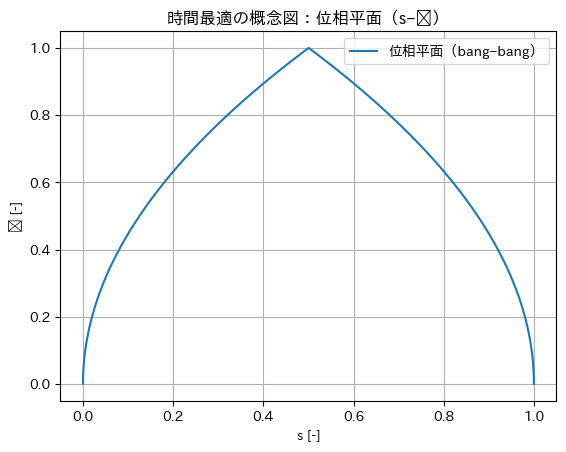

In [2]:

import numpy as np
import matplotlib.pyplot as plt

U = 1.0
dt = 0.001
T_half = 1.0
s, sdot = 0.0, 0.0
S, V = [], []

for _ in np.arange(0, T_half, dt):  # accel
    sddot = U
    sdot += sddot * dt
    s += sdot * dt
    S.append(s); V.append(sdot)
for _ in np.arange(0, T_half, dt):  # decel
    sddot = -U
    sdot = max(0.0, sdot + sddot * dt)
    s += sdot * dt
    S.append(s); V.append(sdot)

plt.figure()
plt.plot(S, V, label="位相平面（bang–bang）")
plt.title("時間最適の概念図：位相平面（s–ṡ）")
plt.xlabel("s [-]"); plt.ylabel("ṡ [-]")
plt.legend(); plt.grid(True)



## 9. 動作計画：A*・PRM・RRT・最適化
低次元は**格子+ A\***、高次元は**PRM/RRT**、仕上げに**最適化**（CHOMP/TrajOpt 等）。  
**C-space** で障害物を扱い、連結性と最適性を設計するレイヤー化が実務の定石。



## 10. 制御：タスク空間 PI と計算トルク
速度モードの基本形：
\[
\mathbf{V}_b=\operatorname{Ad}_{X^{-1}X_d}\mathbf{V}_d + K_P\,\mathbf{X}_e + K_I\!\int \mathbf{X}_e dt.
\]
トルク入力では**計算トルク法**で線形化：
\[
\boldsymbol{\tau}=\tilde M(\ddot{\boldsymbol{\theta}}_d+K_P \mathbf{e}+K_D \dot{\mathbf{e}}+K_I\!\int \mathbf{e}\,dt)+\tilde h.
\]
チューニング目安：まず \(K_P\)、次に \(K_I\)（臨界減衰 \(K_I \approx K_P^2/4\)）。



## 11. 把持・マニピュレーション（力閉包・摩擦円錐）
クーロン摩擦 \(\|f_t\|\le \mu f_n\) → **摩擦円錐**。  
稜線からレンチ円錐を構成し、**力閉包**は原点が正スパン内部に入るか（LP可解か）で判定。



## 12. 移動ロボット：非ホロノミックと全方向、youBot
差動・自動車型は**非ホロ**（横滑り禁止）：\(\dot x\sin\phi-\dot y\cos\phi=0\)。  
オムニ／メカナムは**全方向**、速度制約から**可到達ツイスト多面体**を得る。Lie bracketで局所到達性。



## 13. Capstone 統合（8セグメント）
1) 接近 → 2) 降下 → 3) 把持 → 4) 上昇 → 5) 目標へ → 6) 降下 → 7) 解放 → 8) 退避。  
Milestone：**NextState**、**Trajectory（5次）**、**Feedforward**、**PI**。



## 14. まとめ
- **幾何が土台**：SO(3)/SE(3) とスクリュー理論。  
- **PoE の一行**で運動学・速度・静力学が接続。  
- **RNEA と5次時間則**で実機に優しい軌道。  
- **Feedforward + PI** が速度モードの基本線；力制御・ハイブリッドへ。


### 実演：2R 平面アームのマニピュラビリティ楕円体

/root/miniconda3/envs/modern_robotics/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 775 (\N{COMBINING DOT ABOVE}) missing from font(s) IPAexGothic.
  func(*args, **kwargs)
/root/miniconda3/envs/modern_robotics/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 775 (\N{COMBINING DOT ABOVE}) missing from font(s) IPAexGothic.
  fig.canvas.print_figure(bytes_io, **kw)


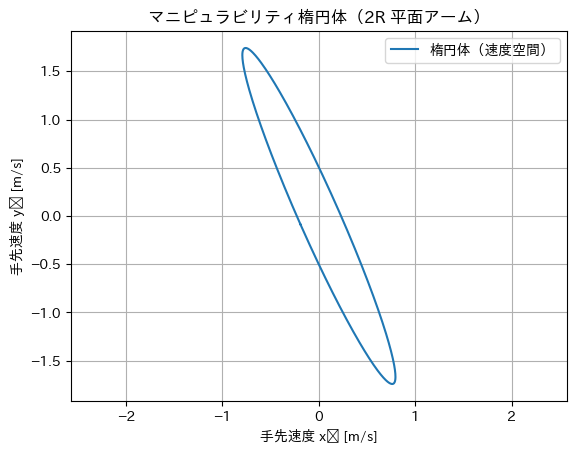

In [3]:

import numpy as np
import matplotlib.pyplot as plt

L1, L2 = 1.0, 0.8
th1, th2 = np.deg2rad(40), np.deg2rad(-30)
s1, c1 = np.sin(th1), np.cos(th1)
s12, c12 = np.sin(th1+th2), np.cos(th1+th2)

J = np.array([[-L1*s1 - L2*s12, -L2*s12],
              [ L1*c1 + L2*c12,  L2*c12]])  # 2x2

A = np.linalg.inv(J @ J.T)
phi = np.linspace(0, 2*np.pi, 400)
v = np.stack([np.cos(phi), np.sin(phi)], axis=0)
eigvals, eigvecs = np.linalg.eigh(np.linalg.inv(A))  # JJ^T
r = np.sqrt(eigvals)
ellipse = eigvecs @ (r[:,None] * v)

plt.figure()
plt.plot(ellipse[0,:], ellipse[1,:], label="楕円体（速度空間）")
plt.axis('equal')
plt.title("マニピュラビリティ楕円体（2R 平面アーム）")
plt.xlabel("手先速度 ẋ [m/s]"); plt.ylabel("手先速度 ẏ [m/s]")
plt.legend(); plt.grid(True)


### 実演：一定スクリュー風の3D軌道

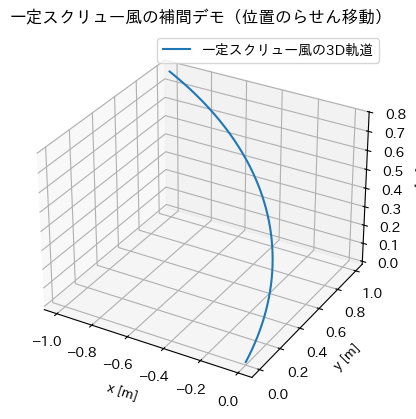

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

theta = np.linspace(0, np.pi/2, 200)
k = 0.5  # pitch-like factor
x = np.cos(theta) - 1.0
y = np.sin(theta)
z = k * theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="一定スクリュー風の3D軌道")
ax.set_title("一定スクリュー風の補間デモ（位置のらせん移動）")
ax.set_xlabel("x [m]"); ax.set_ylabel("y [m]"); ax.set_zlabel("z [m]")
ax.legend()


---

## 15. 付録A：Modern_Robotics_Interactive_Notebook（統合）

# 🤖 Modern Robotics インタラクティブノートブック

## ノースウェスタン大学専門講座の統合インタラクティブノートブック

1. **コース1**：構成空間 ― ロボットの「居場所」を数学的に定義
2. **コース2**：順運動学と逆運動学 ― 関節角度とエンドエフェクタ位置の往復変換
3. **コース3**：ロボット動力学 ― 力とトルクを扱う基盤
4. **コース4**：軌道生成 ― 時間最適なモーションプランニング
5. **コース5**：把持と移動ロボット ― 環境との知的インタラクション
6. **コース6**：キャップストーンプロジェクト ― KUKA youBotによる統合実装

### 🎯 Modern Roboticsを学ぶ理由

**従来アプローチとModern Roboticsの比較:**
- **従来手法**：D-H表現、座標変換の個別計算
- **Modern手法**：Lie群論、指数積法（PoE）、統一された数学的枠組み

**統一理論の力:**
$$SE(3) = \{T \in \mathbb{R}^{4\times 4} : T = \begin{bmatrix} R & p \\ 0 & 1 \end{bmatrix}, R \in SO(3), p \in \mathbb{R}^3\}$$

### 🔧 ノートブックの活用方法

1. 各セクションのコードセルを順番に実行する
2. インタラクティブなウィジェットで挙動を体験する
3. パラメータを変更して結果を観察する
4. 理論と実装の両面から理解を深める

## 🔧 1. 環境設定とライブラリインポート
必要なライブラリをインポートし、環境を設定します。

In [5]:
# ! pip install japanize-matplotlib

In [6]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import sys
import os

# 日本語フォント対応
try:
    import japanize_matplotlib
    print("✅ 日本語フォント対応が有効化されました")
except ImportError:
    print("⚠️ japanize-matplotlib が見つかりません")
    print("pip install japanize-matplotlib でインストールしてください")
    print("日本語テキストが正しく表示されない可能性があります")

# インタラクティブプロットの設定
%matplotlib inline

# Warning suppression
import warnings
warnings.filterwarnings('ignore')

# Modern Roboticsライブラリの読み込み
try:
    import modern_robotics as mr
    print("✅ Modern Robotics ライブラリが読み込まれました")
except ImportError:
    print("⚠️ Modern Robotics ライブラリが見つかりません")
    print("pip install modern-robotics でインストールしてください")

# ipywidgetsの確認
try:
    import ipywidgets as widgets
    from IPython.display import display
    print("✅ インタラクティブウィジェットが利用できます")
except ImportError:
    print("⚠️ ipywidgetsが利用できません - 静的プロットのみ")

print("ℹ️ インラインmatplotlibを使用")
print("🔧 環境設定が完了しました！")
print(f"📊 Numpy バージョン: {np.__version__}")
print(f"📈 Matplotlib バージョン: {plt.matplotlib.__version__}")

✅ 日本語フォント対応が有効化されました
✅ Modern Robotics ライブラリが読み込まれました
✅ インタラクティブウィジェットが利用できます
ℹ️ インラインmatplotlibを使用
🔧 環境設定が完了しました！
📊 Numpy バージョン: 2.2.6
📈 Matplotlib バージョン: 3.10.6


## 🧮 2. Modern Roboticsの数学的基礎

このセクションでは、Modern Roboticsの数学的基礎（Lie群論）を視覚的に探索します。

---

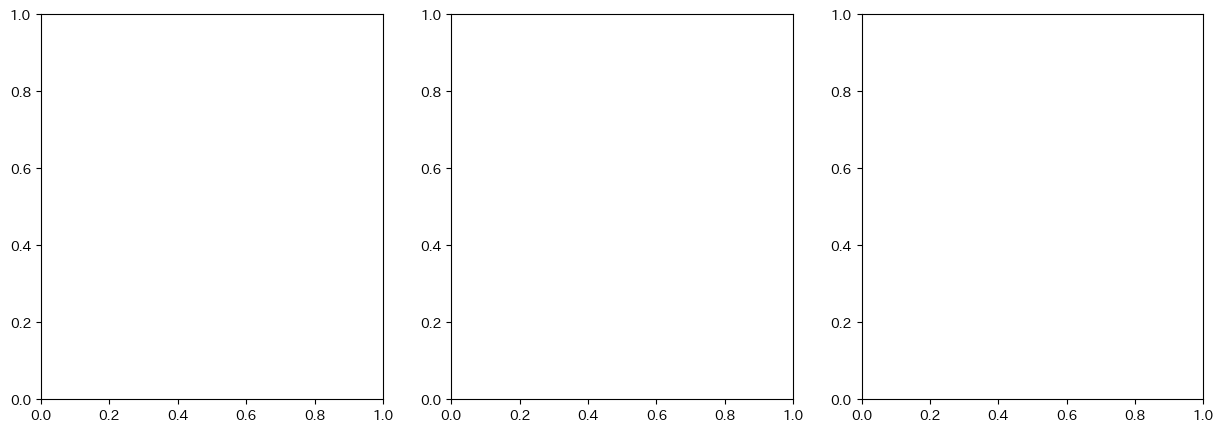

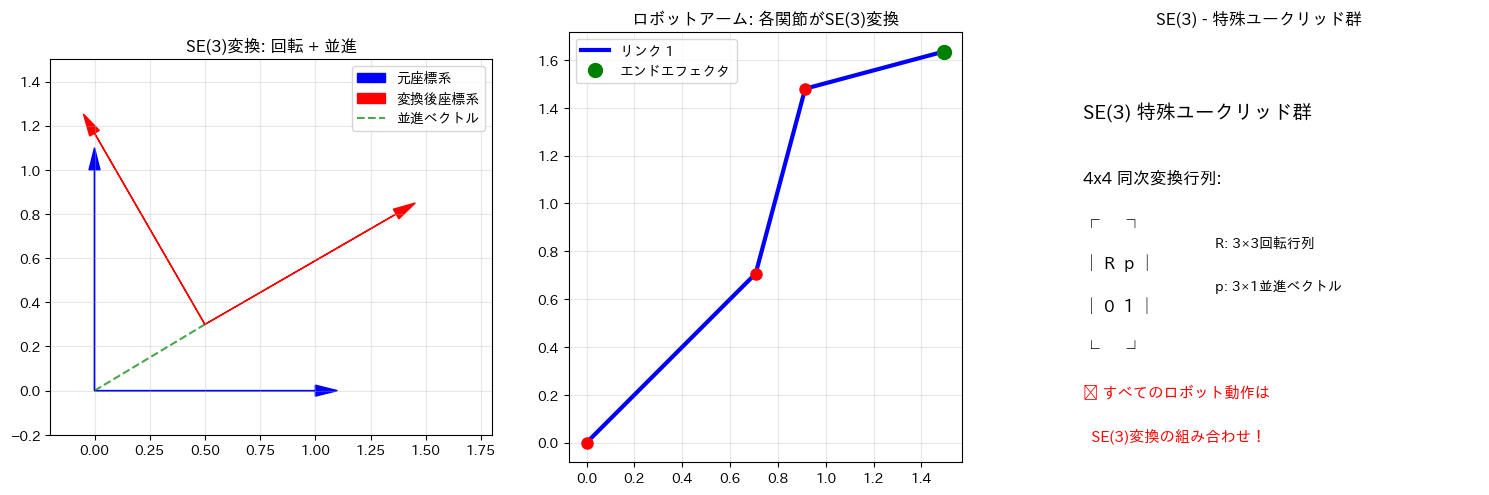

🔑 重要公式 - 積指数（Product of Exponentials）：
T = exp([S₁]θ₁) × exp([S₂]θ₂) × ... × exp([Sₙ]θₙ) × M
   各 exp([Sᵢ]θᵢ) が1つのSE(3)変換を表現
   S: スクリュー軸、θ: 関節角度、M: ホーム位置

✨ この1つの方程式で任意のロボット形状を扱えます！


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def visualize_se3_transformation():
    """SE(3)特殊ユークリッド群の可視化とロボティクスでの意味"""
    
    fig = plt.subplots(1, 3, figsize=(15, 5))
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. SE(3)の幾何学的表現
    ax1 = axes[0]
    
    # 座標フレームの描画
    origin = np.array([0, 0])
    x_axis = np.array([1, 0])
    y_axis = np.array([0, 1])
    
    # 元の座標系
    ax1.arrow(origin[0], origin[1], x_axis[0], x_axis[1], 
              head_width=0.05, head_length=0.1, fc='blue', ec='blue', label='元座標系')
    ax1.arrow(origin[0], origin[1], y_axis[0], y_axis[1], 
              head_width=0.05, head_length=0.1, fc='blue', ec='blue')
    
    # 変換後の座標系
    theta = np.pi/6  # 30度回転
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    p = np.array([0.5, 0.3])  # 並進
    
    x_transformed = R @ x_axis
    y_transformed = R @ y_axis
    
    ax1.arrow(p[0], p[1], x_transformed[0], x_transformed[1], 
              head_width=0.05, head_length=0.1, fc='red', ec='red', label='変換後座標系')
    ax1.arrow(p[0], p[1], y_transformed[0], y_transformed[1], 
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    
    ax1.plot([0, p[0]], [0, p[1]], 'g--', alpha=0.7, label='並進ベクトル')
    ax1.set_xlim(-0.2, 1.8)
    ax1.set_ylim(-0.2, 1.5)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_title('SE(3)変換: 回転 + 並進', fontsize=12)
    
    # 2. ロボットのリンク変換
    ax2 = axes[1]
    
    # 3リンクロボットアームの描画
    link_lengths = [1.0, 0.8, 0.6]
    joint_angles = [np.pi/4, np.pi/6, -np.pi/3]
    
    # 順運動学計算
    positions = [[0, 0]]
    current_angle = 0
    
    for i, (length, angle) in enumerate(zip(link_lengths, joint_angles)):
        current_angle += angle
        next_pos = [positions[-1][0] + length * np.cos(current_angle),
                   positions[-1][1] + length * np.sin(current_angle)]
        positions.append(next_pos)
    
    positions = np.array(positions)
    
    # リンクの描画
    for i in range(len(positions)-1):
        ax2.plot([positions[i][0], positions[i+1][0]], 
                [positions[i][1], positions[i+1][1]], 
                'b-', linewidth=3, label=f'リンク {i+1}' if i < 1 else "")
        ax2.plot(positions[i][0], positions[i][1], 'ro', markersize=8)
    
    ax2.plot(positions[-1][0], positions[-1][1], 'go', markersize=10, label='エンドエフェクタ')
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_title('ロボットアーム: 各関節がSE(3)変換', fontsize=12)
    
    # 3. 数学的定義
    ax3 = axes[2]
    ax3.text(0.1, 0.8, 'SE(3) 特殊ユークリッド群', 
             fontsize=14, fontweight='bold', transform=ax3.transAxes)
    
    # 行列表現（テキストで）
    ax3.text(0.1, 0.65, '4x4 同次変換行列:', 
             fontsize=12, transform=ax3.transAxes)
    ax3.text(0.1, 0.55, '┌      ┐', fontsize=12, transform=ax3.transAxes)
    ax3.text(0.1, 0.45, '│ R  p │', fontsize=12, transform=ax3.transAxes)
    ax3.text(0.1, 0.35, '│ 0  1 │', fontsize=12, transform=ax3.transAxes)
    ax3.text(0.1, 0.25, '└      ┘', fontsize=12, transform=ax3.transAxes)
    
    ax3.text(0.4, 0.5, 'R: 3×3回転行列', fontsize=10, transform=ax3.transAxes)
    ax3.text(0.4, 0.4, 'p: 3×1並進ベクトル', fontsize=10, transform=ax3.transAxes)
    
    ax3.text(0.1, 0.15, '🔑 すべてのロボット動作は', 
             fontsize=11, transform=ax3.transAxes, color='red')
    ax3.text(0.1, 0.05, '  SE(3)変換の組み合わせ！', 
             fontsize=11, transform=ax3.transAxes, color='red')
    
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    ax3.set_title('SE(3) - 特殊ユークリッド群', fontsize=12)
    ax3.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("🔑 重要公式 - 積指数（Product of Exponentials）：")
    print("T = exp([S₁]θ₁) × exp([S₂]θ₂) × ... × exp([Sₙ]θₙ) × M")
    print("   各 exp([Sᵢ]θᵢ) が1つのSE(3)変換を表現")
    print("   S: スクリュー軸、θ: 関節角度、M: ホーム位置")
    print()
    print("✨ この1つの方程式で任意のロボット形状を扱えます！")

# 実行
visualize_se3_transformation()

## 🌍 3. 構成空間インタラクティブデモ

### コース1：構成空間（C空間）

**コンセプト**：ロボットの「居場所」を数学的に定義する空間
**重要な洞察**：関節空間での直線は、作業空間では曲線になる！

---

🌍 コンフィギュレーション空間のデモンストレーション


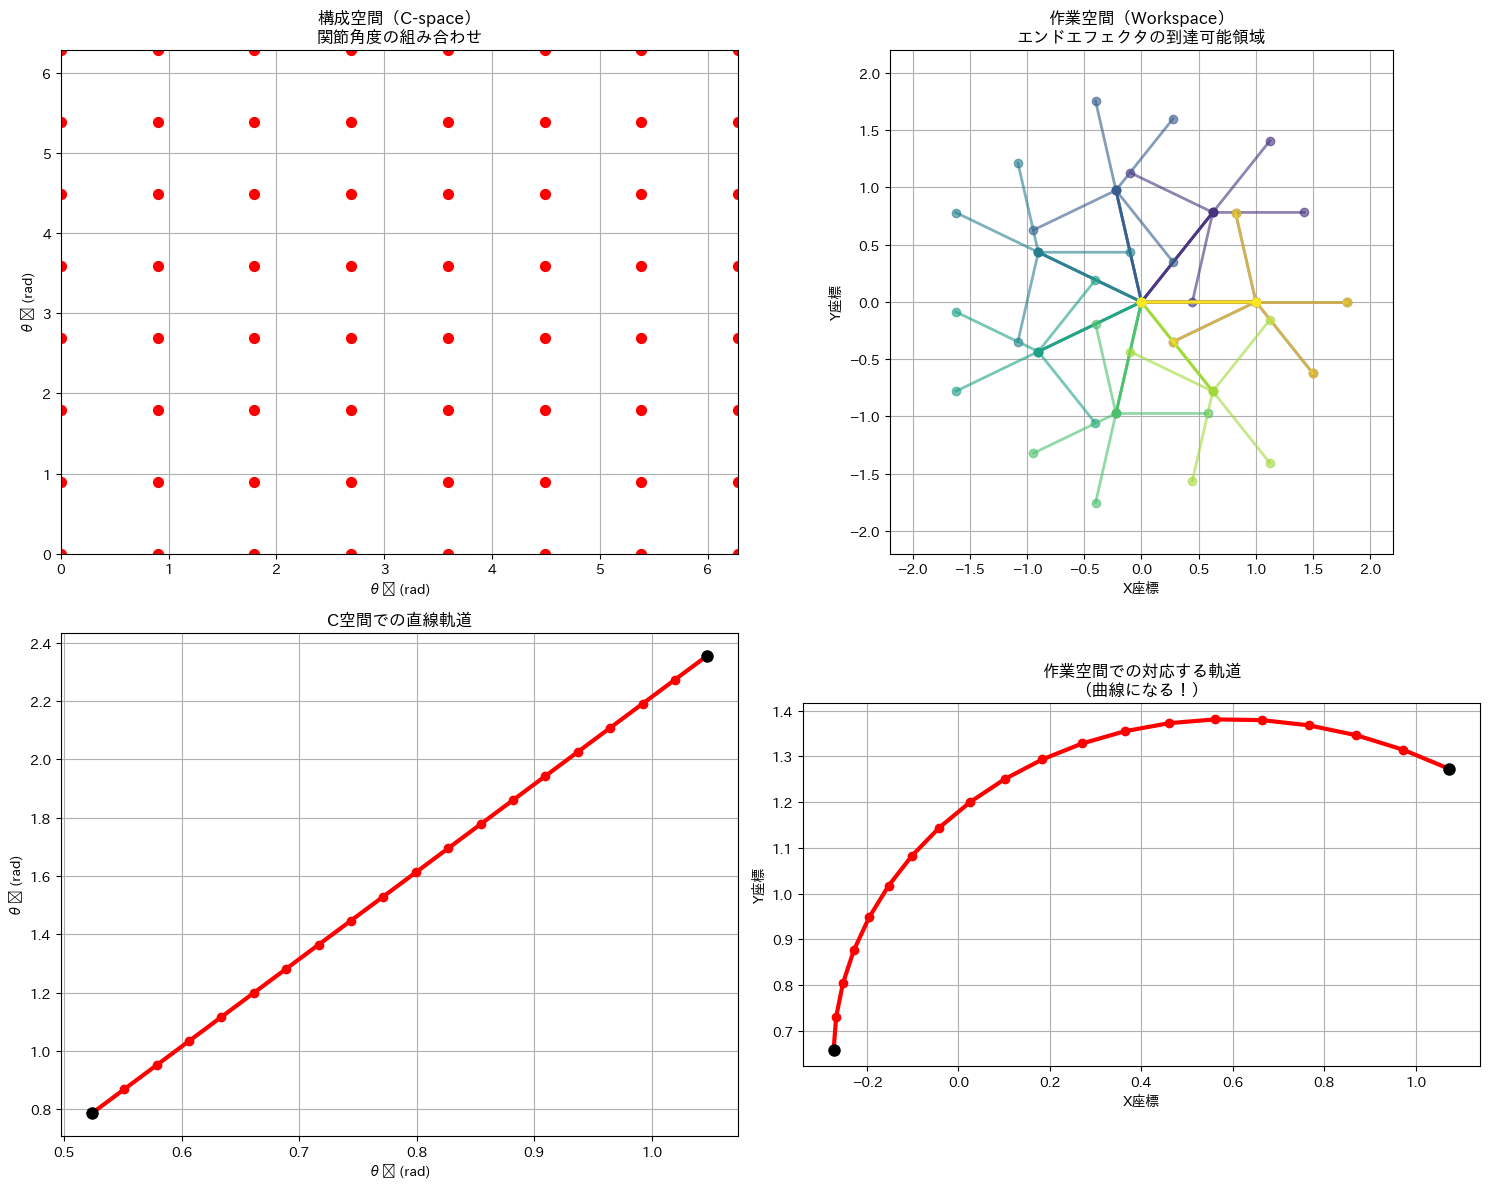

💡 重要な洞察:
• C空間での直線軌道 → 作業空間では曲線軌道
• 関節角度の線形補間では、直線的なエンドエフェクタ動作は得られない
• 直線軌道が必要な場合は、逆運動学を使った軌道計画が必要


In [8]:
# 2関節平面アームの構成空間デモ

def two_link_arm_demo():
    """2関節アームの構成空間と作業空間の関係を表示"""
    
    print("🌍 コンフィギュレーション空間のデモンストレーション")
    
    # リンク長の設定
    L1, L2 = 1.0, 0.8
    
    # 関節角度の範囲
    theta1_range = np.linspace(0, 2*np.pi, 8)
    theta2_range = np.linspace(0, 2*np.pi, 8)
    
    # 図の設定
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 構成空間の表示
    theta1_grid, theta2_grid = np.meshgrid(theta1_range, theta2_range)
    ax1.scatter(theta1_grid, theta2_grid, c='red', s=50)
    ax1.set_xlabel('θ₁ (rad)')
    ax1.set_ylabel('θ₂ (rad)')
    ax1.set_title('構成空間（C-space）\n関節角度の組み合わせ')
    ax1.grid(True)
    ax1.set_xlim(0, 2*np.pi)
    ax1.set_ylim(0, 2*np.pi)
    
    # 2. 作業空間でのアーム形状
    colors = plt.cm.viridis(np.linspace(0, 1, len(theta1_range)))
    
    for i, theta1 in enumerate(theta1_range):
        for j, theta2 in enumerate(theta2_range[::2]):  # 一部のみ表示
            # 前向き運動学の計算
            x1 = L1 * np.cos(theta1)
            y1 = L1 * np.sin(theta1)
            x2 = x1 + L2 * np.cos(theta1 + theta2)
            y2 = y1 + L2 * np.sin(theta1 + theta2)
            
            # アームの描画
            ax2.plot([0, x1, x2], [0, y1, y2], 'o-', 
                    color=colors[i], alpha=0.6, linewidth=2)
    
    ax2.set_xlabel('X座標')
    ax2.set_ylabel('Y座標')
    ax2.set_title('作業空間（Workspace）\nエンドエフェクタの到達可能領域')
    ax2.grid(True)
    ax2.set_aspect('equal')
    ax2.set_xlim(-2.2, 2.2)
    ax2.set_ylim(-2.2, 2.2)
    
    # 3. C空間での直線軌道
    theta1_start, theta1_end = np.pi/6, np.pi/3
    theta2_start, theta2_end = np.pi/4, 3*np.pi/4
    
    t = np.linspace(0, 1, 20)
    theta1_traj = theta1_start + t * (theta1_end - theta1_start)
    theta2_traj = theta2_start + t * (theta2_end - theta2_start)
    
    ax3.plot(theta1_traj, theta2_traj, 'r-o', linewidth=3, markersize=6)
    ax3.plot([theta1_start, theta1_end], [theta2_start, theta2_end], 'ko', markersize=8)
    ax3.set_xlabel('θ₁ (rad)')
    ax3.set_ylabel('θ₂ (rad)')
    ax3.set_title('C空間での直線軌道')
    ax3.grid(True)
    
    # 4. 対応する作業空間での軌道（曲線になる！）
    x_traj = []
    y_traj = []
    
    for th1, th2 in zip(theta1_traj, theta2_traj):
        x1 = L1 * np.cos(th1)
        y1 = L1 * np.sin(th1)
        x2 = x1 + L2 * np.cos(th1 + th2)
        y2 = y1 + L2 * np.sin(th1 + th2)
        x_traj.append(x2)
        y_traj.append(y2)
    
    ax4.plot(x_traj, y_traj, 'r-o', linewidth=3, markersize=6)
    ax4.plot([x_traj[0], x_traj[-1]], [y_traj[0], y_traj[-1]], 'ko', markersize=8)
    ax4.set_xlabel('X座標')
    ax4.set_ylabel('Y座標')
    ax4.set_title('作業空間での対応する軌道\n（曲線になる！）')
    ax4.grid(True)
    ax4.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    print("💡 重要な洞察:")
    print("• C空間での直線軌道 → 作業空間では曲線軌道")
    print("• 関節角度の線形補間では、直線的なエンドエフェクタ動作は得られない")
    print("• 直線軌道が必要な場合は、逆運動学を使った軌道計画が必要")

# 実行
two_link_arm_demo()

## 🔧 4. 順運動学実装

### コース2：順運動学と逆運動学

**コンセプト**：関節角度からエンドエフェクタ位置・姿勢の計算
**Modern手法**：積指数法（Product of Exponentials）を使用

---

🔧 積指数法による順運動学デモ
関節角度: θ₁=0.524, θ₂=0.785, θ₃=1.047
\n🔢 積指数法による変換行列:
T = e^{[S₁]θ₁} e^{[S₂]θ₂} e^{[S₃]θ₃} M
\n最終変換行列 T:
[[-0.70710678 -0.70710678  0.         -2.0655707 ]
 [ 0.70710678 -0.70710678  0.         -0.3674006 ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
\n📍 エンドエフェクタ位置: [-2.066, -0.367, 0.000]


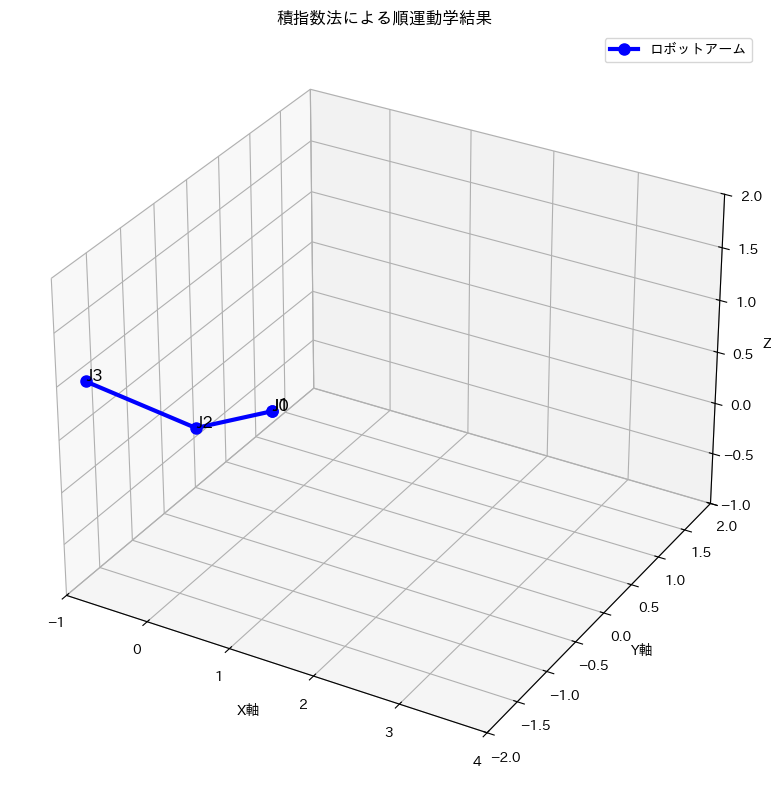

\n💡 積指数法の利点:
• 統一された数学的枠組み
• 特異点での安定した計算
• Lie群論の美しい応用
• プログラム実装の簡潔性


In [9]:
# 積指数法による順運動学の実装

def forward_kinematics_demo():
    """順運動学のデモンストレーション"""
    
    print("🔧 積指数法による順運動学デモ")
    
    # 3DOF平面アームの例
    # スクリュー軸の定義（空間固定フレームでの表現）
    # 各関節はz軸周りの回転
    S1 = np.array([0, 0, 1, 0, 0, 0])  # 関節1のスクリュー軸
    S2 = np.array([0, 0, 1, -1, 0, 0])  # 関節2のスクリュー軸
    S3 = np.array([0, 0, 1, -2, 0, 0])  # 関節3のスクリュー軸
    
    # ホーム配置 M
    M = np.array([[1, 0, 0, 3],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    
    # 関節角度の設定
    theta = [np.pi/6, np.pi/4, np.pi/3]
    
    print(f"関節角度: θ₁={theta[0]:.3f}, θ₂={theta[1]:.3f}, θ₃={theta[2]:.3f}")
    
    # 各関節の変換行列を計算
    def skew_symmetric(v):
        """ベクトルから歪対称行列を生成"""
        if len(v) == 3:  # 回転ベクトルの場合
            return np.array([[0, -v[2], v[1]],
                           [v[2], 0, -v[0]],
                           [-v[1], v[0], 0]])
        elif len(v) == 6:  # スクリューベクトルの場合
            omega = v[:3]
            v_linear = v[3:]
            omega_hat = skew_symmetric(omega)
            return np.vstack([
                np.hstack([omega_hat, v_linear.reshape(-1, 1)]),
                np.array([0, 0, 0, 0])
            ])
    
    def matrix_exp_se3(S, theta):
        """SE(3)の行列指数を計算"""
        if abs(theta) < 1e-6:
            return np.eye(4)
        
        omega = S[:3]
        v = S[3:]
        omega_hat = skew_symmetric(omega)
        
        if np.linalg.norm(omega) < 1e-6:  # 純粋な平行移動
            return np.vstack([
                np.hstack([np.eye(3), (v * theta).reshape(-1, 1)]),
                np.array([0, 0, 0, 1])
            ])
        else:  # 回転を含む
            theta_norm = np.linalg.norm(omega)
            omega_normalized = omega / theta_norm
            omega_hat_normalized = skew_symmetric(omega_normalized)
            
            R = (np.eye(3) + 
                 np.sin(theta * theta_norm) * omega_hat_normalized +
                 (1 - np.cos(theta * theta_norm)) * omega_hat_normalized @ omega_hat_normalized)
            
            V = (np.eye(3) + 
                 (1 - np.cos(theta * theta_norm)) / theta_norm * omega_hat_normalized +
                 (theta * theta_norm - np.sin(theta * theta_norm)) / theta_norm * 
                 omega_hat_normalized @ omega_hat_normalized)
            
            p = V @ (v * theta / theta_norm)
            
            return np.vstack([
                np.hstack([R, p.reshape(-1, 1)]),
                np.array([0, 0, 0, 1])
            ])
    
    # 積指数法による順運動学の計算
    T1 = matrix_exp_se3(S1, theta[0])
    T2 = matrix_exp_se3(S2, theta[1])
    T3 = matrix_exp_se3(S3, theta[2])
    
    # 最終的な変換行列
    T_final = T1 @ T2 @ T3 @ M
    
    print("\\n🔢 積指数法による変換行列:")
    print("T = e^{[S₁]θ₁} e^{[S₂]θ₂} e^{[S₃]θ₃} M")
    print(f"\\n最終変換行列 T:")
    print(T_final)
    
    # エンドエフェクタの位置と姿勢
    position = T_final[:3, 3]
    rotation = T_final[:3, :3]
    
    print(f"\\n📍 エンドエフェクタ位置: [{position[0]:.3f}, {position[1]:.3f}, {position[2]:.3f}]")
    
    # 視覚化
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 各関節位置の計算と描画
    origins = [np.array([0, 0, 0])]
    
    # 各段階での変換を追跡
    T_current = np.eye(4)
    joint_positions = [T_current[:3, 3]]
    
    for i, (S, th) in enumerate(zip([S1, S2, S3], theta)):
        T_current = T_current @ matrix_exp_se3(S, th)
        if i < 2:  # 最後の関節以外
            joint_positions.append(T_current[:3, 3])
    
    # 最終位置（ホーム配置を適用）
    T_current = T_current @ M
    joint_positions.append(T_current[:3, 3])
    
    # アームの描画
    positions = np.array(joint_positions)
    ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 
            'bo-', linewidth=3, markersize=8, label='ロボットアーム')
    
    # 座標軸の描画
    for i, pos in enumerate(joint_positions):
        ax.text(pos[0], pos[1], pos[2], f'J{i}', fontsize=12)
    
    ax.set_xlabel('X軸')
    ax.set_ylabel('Y軸')
    ax.set_zlabel('Z軸')
    ax.set_title('積指数法による順運動学結果')
    ax.legend()
    ax.set_xlim(-1, 4)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-1, 2)
    
    plt.tight_layout()
    plt.show()
    
    print("\\n💡 積指数法の利点:")
    print("• 統一された数学的枠組み")
    print("• 特異点での安定した計算")
    print("• Lie群論の美しい応用")
    print("• プログラム実装の簡潔性")

# 実行
forward_kinematics_demo()

## 📈 5. 軌道生成

### コース4：軌道生成

**コンセプト**：時間最適な滑らかなロボット動作の計画
**重要技術**：3次スプライン、5次多項式、台形速度プロファイル

---

📈 軌道生成デモンストレーション
初期位置: [0. 0. 0.]
終了位置: [ 1.57079633  1.04719755 -0.78539816]
移動時間: 2.0秒


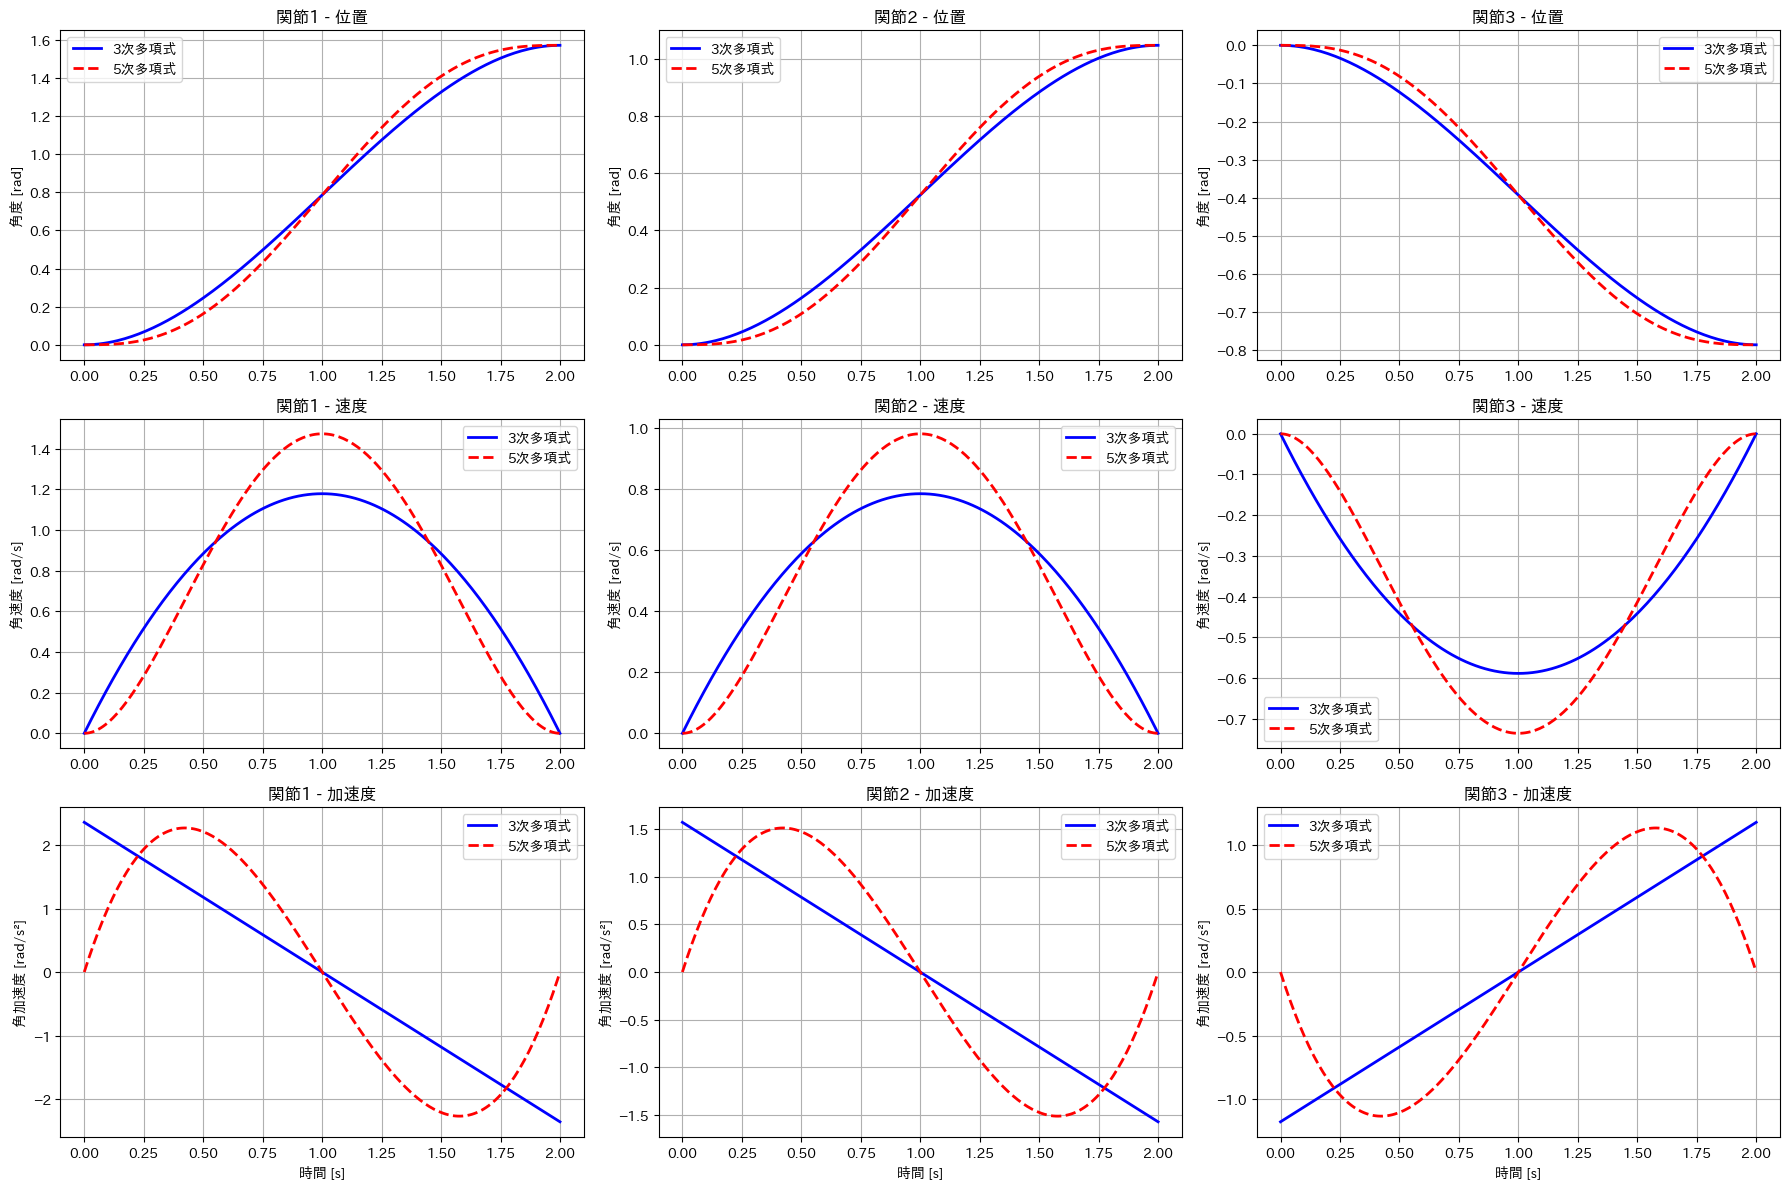

\n💡 軌道生成の特徴:
• 3次多項式：位置の境界条件のみを満たす
• 5次多項式：位置と速度の境界条件を満たす（より滑らか）
• 5次多項式の方が加速度の不連続性が少ない
• 実際のロボット制御では5次多項式がよく使用される


In [10]:
# 軌道生成アルゴリズムの実装

def trajectory_generation_demo():
    """軌道生成のデモンストレーション"""
    
    print("📈 軌道生成デモンストレーション")
    
    # 時間設定
    t_start = 0.0
    t_end = 2.0
    dt = 0.01
    time_points = np.arange(t_start, t_end + dt, dt)
    
    # 初期・終了条件
    q_start = np.array([0.0, 0.0, 0.0])  # 初期関節角度
    q_end = np.array([np.pi/2, np.pi/3, -np.pi/4])  # 終了関節角度
    
    # 初期・終了速度（ゼロ）
    qd_start = np.array([0.0, 0.0, 0.0])
    qd_end = np.array([0.0, 0.0, 0.0])
    
    print(f"初期位置: {q_start}")
    print(f"終了位置: {q_end}")
    print(f"移動時間: {t_end}秒")
    
    # 1. 3次多項式軌道
    def cubic_trajectory(t, tf, q0, qf):
        """3次多項式軌道"""
        s = t / tf  # 正規化時間
        q = q0 + (qf - q0) * (3 * s**2 - 2 * s**3)
        qd = (qf - q0) / tf * (6 * s - 6 * s**2)
        qdd = (qf - q0) / tf**2 * (6 - 12 * s)
        return q, qd, qdd
    
    # 2. 5次多項式軌道
    def quintic_trajectory(t, tf, q0, qf, qd0, qdf):
        """5次多項式軌道"""
        s = t / tf
        # 5次多項式の係数
        h0 = 1
        h1 = 0
        h2 = -3
        h3 = 2
        h4 = 0
        h5 = 0
        
        # 位置、速度、加速度
        q = q0 * (1 - 10*s**3 + 15*s**4 - 6*s**5) + qf * (10*s**3 - 15*s**4 + 6*s**5) + \
            qd0 * tf * (s - 6*s**3 + 8*s**4 - 3*s**5) + qdf * tf * (-4*s**3 + 7*s**4 - 3*s**5)
        
        qd = (q0 * (-30*s**2 + 60*s**3 - 30*s**4) + qf * (30*s**2 - 60*s**3 + 30*s**4) + \
              qd0 * tf * (1 - 18*s**2 + 32*s**3 - 15*s**4) + qdf * tf * (-12*s**2 + 28*s**3 - 15*s**4)) / tf
        
        qdd = (q0 * (-60*s + 180*s**2 - 120*s**3) + qf * (60*s - 180*s**2 + 120*s**3) + \
               qd0 * tf * (-36*s + 96*s**2 - 60*s**3) + qdf * tf * (-24*s + 84*s**2 - 60*s**3)) / tf**2
        
        return q, qd, qdd
    
    # 軌道計算
    q_cubic = []
    qd_cubic = []
    qdd_cubic = []
    
    q_quintic = []
    qd_quintic = []
    qdd_quintic = []
    
    for t in time_points:
        # 3次多項式
        q_c, qd_c, qdd_c = cubic_trajectory(t, t_end, q_start, q_end)
        q_cubic.append(q_c)
        qd_cubic.append(qd_c)
        qdd_cubic.append(qdd_c)
        
        # 5次多項式
        q_q, qd_q, qdd_q = quintic_trajectory(t, t_end, q_start, q_end, qd_start, qd_end)
        q_quintic.append(q_q)
        qd_quintic.append(qd_q)
        qdd_quintic.append(qdd_q)
    
    q_cubic = np.array(q_cubic)
    qd_cubic = np.array(qd_cubic)
    qdd_cubic = np.array(qdd_cubic)
    
    q_quintic = np.array(q_quintic)
    qd_quintic = np.array(qd_quintic)
    qdd_quintic = np.array(qdd_quintic)
    
    # 視覚化
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    joint_names = ['関節1', '関節2', '関節3']
    
    for i in range(3):
        # 位置
        axes[0, i].plot(time_points, q_cubic[:, i], 'b-', linewidth=2, label='3次多項式')
        axes[0, i].plot(time_points, q_quintic[:, i], 'r--', linewidth=2, label='5次多項式')
        axes[0, i].set_title(f'{joint_names[i]} - 位置')
        axes[0, i].set_ylabel('角度 [rad]')
        axes[0, i].grid(True)
        axes[0, i].legend()
        
        # 速度
        axes[1, i].plot(time_points, qd_cubic[:, i], 'b-', linewidth=2, label='3次多項式')
        axes[1, i].plot(time_points, qd_quintic[:, i], 'r--', linewidth=2, label='5次多項式')
        axes[1, i].set_title(f'{joint_names[i]} - 速度')
        axes[1, i].set_ylabel('角速度 [rad/s]')
        axes[1, i].grid(True)
        axes[1, i].legend()
        
        # 加速度
        axes[2, i].plot(time_points, qdd_cubic[:, i], 'b-', linewidth=2, label='3次多項式')
        axes[2, i].plot(time_points, qdd_quintic[:, i], 'r--', linewidth=2, label='5次多項式')
        axes[2, i].set_title(f'{joint_names[i]} - 加速度')
        axes[2, i].set_xlabel('時間 [s]')
        axes[2, i].set_ylabel('角加速度 [rad/s²]')
        axes[2, i].grid(True)
        axes[2, i].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\\n💡 軌道生成の特徴:")
    print("• 3次多項式：位置の境界条件のみを満たす")
    print("• 5次多項式：位置と速度の境界条件を満たす（より滑らか）")
    print("• 5次多項式の方が加速度の不連続性が少ない")
    print("• 実際のロボット制御では5次多項式がよく使用される")

# 実行
trajectory_generation_demo()

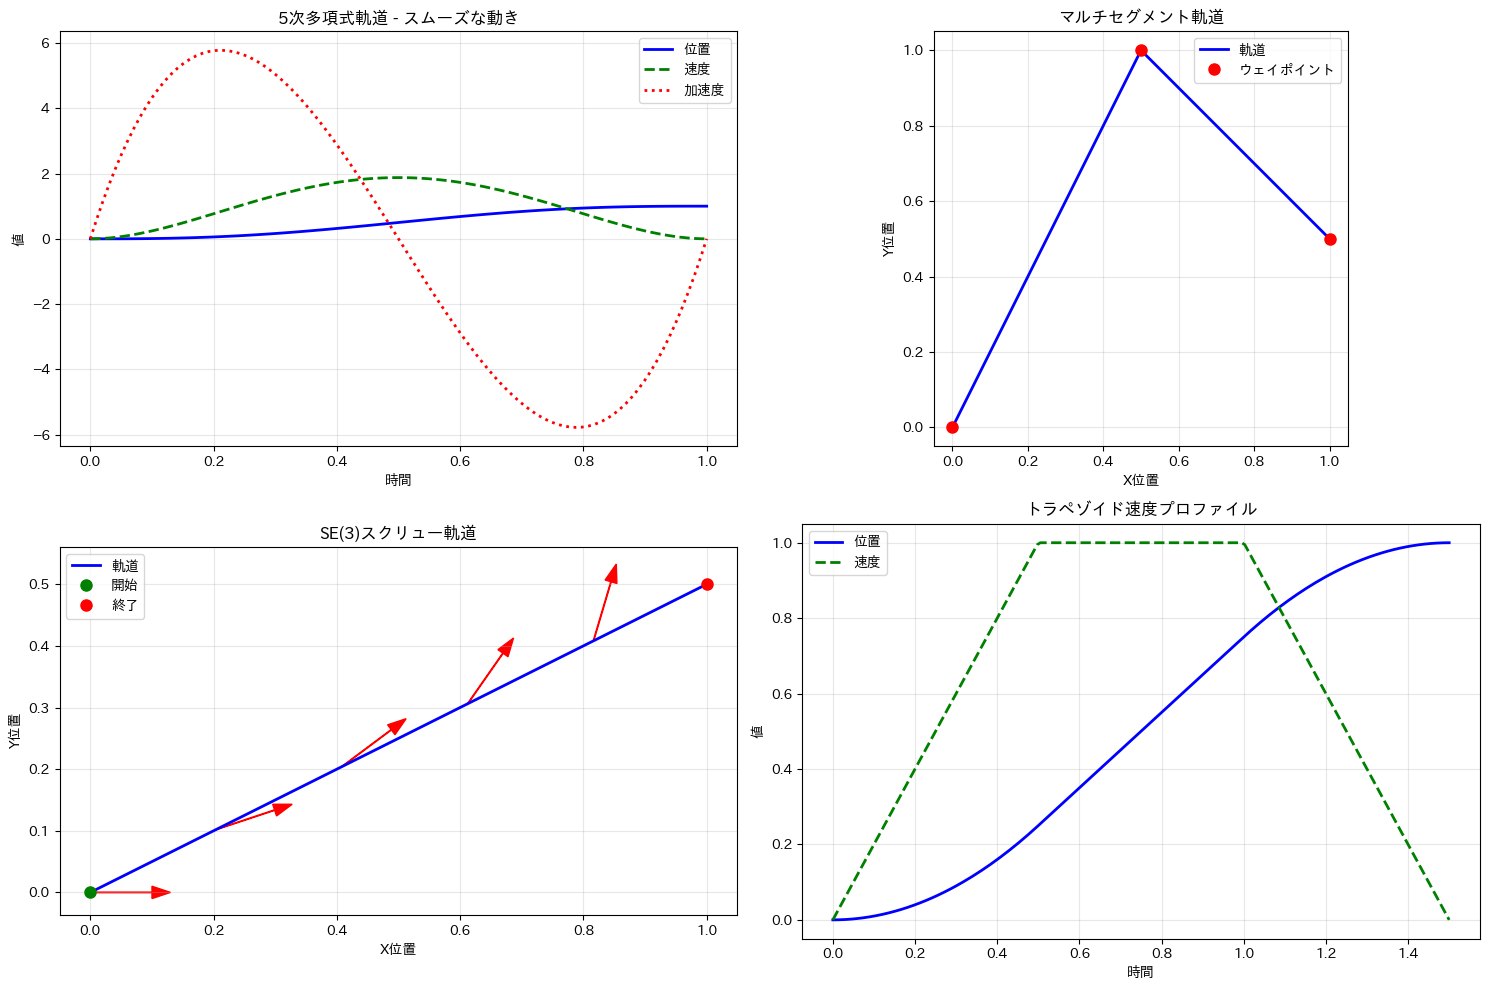

🎯 軌道生成の重要ポイント：
1. 5次多項式: 位置・速度・加速度が連続
2. マルチセグメント: 複数ウェイポイントを通過
3. スクリュー軌道: SE(3)空間での最短パス
4. 時間スケーリング: 動力学的制約を考慮

💡 実際のロボットでは全ての手法を組み合わせて使用します！


In [11]:
def interactive_trajectory_generation():
    """軌道生成の可視化 - スムーズな動きの作り方"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. 5次多項式軌道
    ax1 = axes[0, 0]
    
    # 時間軸
    t = np.linspace(0, 1, 100)
    
    # 境界条件
    start_pos, end_pos = 0, 1
    start_vel, end_vel = 0, 0
    start_acc, end_acc = 0, 0
    
    # 5次多項式係数計算
    A = np.array([
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [0, 1, 2, 3, 4, 5],
        [0, 0, 2, 6, 12, 20]
    ])
    b = np.array([start_pos, start_vel, start_acc, end_pos, end_vel, end_acc])
    coeffs = np.linalg.solve(A, b)
    
    # 軌道生成
    position = sum(coeffs[i] * t**i for i in range(6))
    velocity = sum(i * coeffs[i] * t**(i-1) for i in range(1, 6))
    acceleration = sum(i * (i-1) * coeffs[i] * t**(i-2) for i in range(2, 6))
    
    ax1.plot(t, position, 'b-', linewidth=2, label='位置')
    ax1.plot(t, velocity, 'g--', linewidth=2, label='速度')
    ax1.plot(t, acceleration, 'r:', linewidth=2, label='加速度')
    ax1.set_xlabel('時間')
    ax1.set_ylabel('値')
    ax1.set_title('5次多項式軌道 - スムーズな動き', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. 複数セグメント軌道
    ax2 = axes[0, 1]
    
    # 3つのウェイポイント
    waypoints = np.array([[0, 0], [0.5, 1], [1, 0.5]])
    times = [0, 0.5, 1.0]
    
    # 各セグメントの軌道生成
    t_total = np.linspace(0, 1, 200)
    x_total, y_total = [], []
    
    for i in range(len(waypoints)-1):
        t_seg = np.linspace(times[i], times[i+1], 67)
        dt = times[i+1] - times[i]
        
        # 正規化時間
        s = (t_seg - times[i]) / dt
        
        # 5次多項式補間
        x_seg = waypoints[i][0] + (waypoints[i+1][0] - waypoints[i][0]) * \
                (10*s**3 - 15*s**4 + 6*s**5)
        y_seg = waypoints[i][1] + (waypoints[i+1][1] - waypoints[i][1]) * \
                (10*s**3 - 15*s**4 + 6*s**5)
        
        x_total.extend(x_seg)
        y_total.extend(y_seg)
    
    ax2.plot(x_total, y_total, 'b-', linewidth=2, label='軌道')
    ax2.plot(waypoints[:, 0], waypoints[:, 1], 'ro', markersize=8, label='ウェイポイント')
    ax2.set_xlabel('X位置')
    ax2.set_ylabel('Y位置')
    ax2.set_title('マルチセグメント軌道', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    
    # 3. スクリュー軌道（SE(3)での軌道生成）
    ax3 = axes[1, 0]
    
    # 開始・終了姿勢
    T_start = np.eye(4)
    T_end = np.array([
        [0, -1, 0, 1],
        [1, 0, 0, 0.5],
        [0, 0, 1, 0.2],
        [0, 0, 0, 1]
    ])
    
    # スクリュー軌道の可視化（2Dプロジェクション）
    t_screw = np.linspace(0, 1, 50)
    positions = []
    orientations = []
    
    for ti in t_screw:
        # 線形補間（簡略化）
        pos = (1-ti) * T_start[:3, 3] + ti * T_end[:3, 3]
        positions.append(pos[:2])  # XY平面のプロジェクション
        
        # 回転角の線形補間（簡略化）
        angle = ti * np.pi/2
        orientations.append(angle)
    
    positions = np.array(positions)
    
    # 軌道プロット
    ax3.plot(positions[:, 0], positions[:, 1], 'b-', linewidth=2, label='軌道')
    
    # 姿勢の可視化（数点）
    for i in range(0, len(positions), 10):
        x, y = positions[i]
        angle = orientations[i]
        dx, dy = 0.1 * np.cos(angle), 0.1 * np.sin(angle)
        ax3.arrow(x, y, dx, dy, head_width=0.02, head_length=0.03, fc='red', ec='red')
    
    ax3.plot(T_start[0, 3], T_start[1, 3], 'go', markersize=8, label='開始')
    ax3.plot(T_end[0, 3], T_end[1, 3], 'ro', markersize=8, label='終了')
    ax3.set_xlabel('X位置')
    ax3.set_ylabel('Y位置')
    ax3.set_title('SE(3)スクリュー軌道', fontsize=12)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_aspect('equal')
    
    # 4. 時間スケーリング（トラペゾイド速度プロファイル）
    ax4 = axes[1, 1]
    
    # パラメータ
    T_total = 2.0  # 総時間
    v_max = 1.0    # 最大速度
    a_max = 2.0    # 最大加速度
    
    # 加速・定速・減速の時間
    t_acc = v_max / a_max
    s_total = 1.0  # 総移動距離
    s_acc = 0.5 * a_max * t_acc**2
    
    # 定速時間の計算
    if 2 * s_acc <= s_total:
        s_const = s_total - 2 * s_acc
        t_const = s_const / v_max
    else:
        # 三角プロファイル
        t_acc = np.sqrt(s_total / a_max)
        t_const = 0
        s_acc = 0.5 * s_total
    
    t_dec = t_acc
    
    # 時間軸
    t_trap = np.linspace(0, t_acc + t_const + t_dec, 200)
    v_trap = np.zeros_like(t_trap)
    s_trap = np.zeros_like(t_trap)
    
    for i, t in enumerate(t_trap):
        if t <= t_acc:
            # 加速段階
            v_trap[i] = a_max * t
            s_trap[i] = 0.5 * a_max * t**2
        elif t <= t_acc + t_const:
            # 定速段階
            v_trap[i] = v_max
            s_trap[i] = s_acc + v_max * (t - t_acc)
        else:
            # 減速段階
            t_d = t - t_acc - t_const
            v_trap[i] = v_max - a_max * t_d
            s_trap[i] = s_acc + v_max * t_const + v_max * t_d - 0.5 * a_max * t_d**2
    
    ax4.plot(t_trap, s_trap, 'b-', linewidth=2, label='位置')
    ax4.plot(t_trap, v_trap, 'g--', linewidth=2, label='速度')
    ax4.set_xlabel('時間')
    ax4.set_ylabel('値')
    ax4.set_title('トラペゾイド速度プロファイル', fontsize=12)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("🎯 軌道生成の重要ポイント：")
    print("1. 5次多項式: 位置・速度・加速度が連続")
    print("2. マルチセグメント: 複数ウェイポイントを通過")
    print("3. スクリュー軌道: SE(3)空間での最短パス")
    print("4. 時間スケーリング: 動力学的制約を考慮")
    print()
    print("💡 実際のロボットでは全ての手法を組み合わせて使用します！")

# 実行
interactive_trajectory_generation()

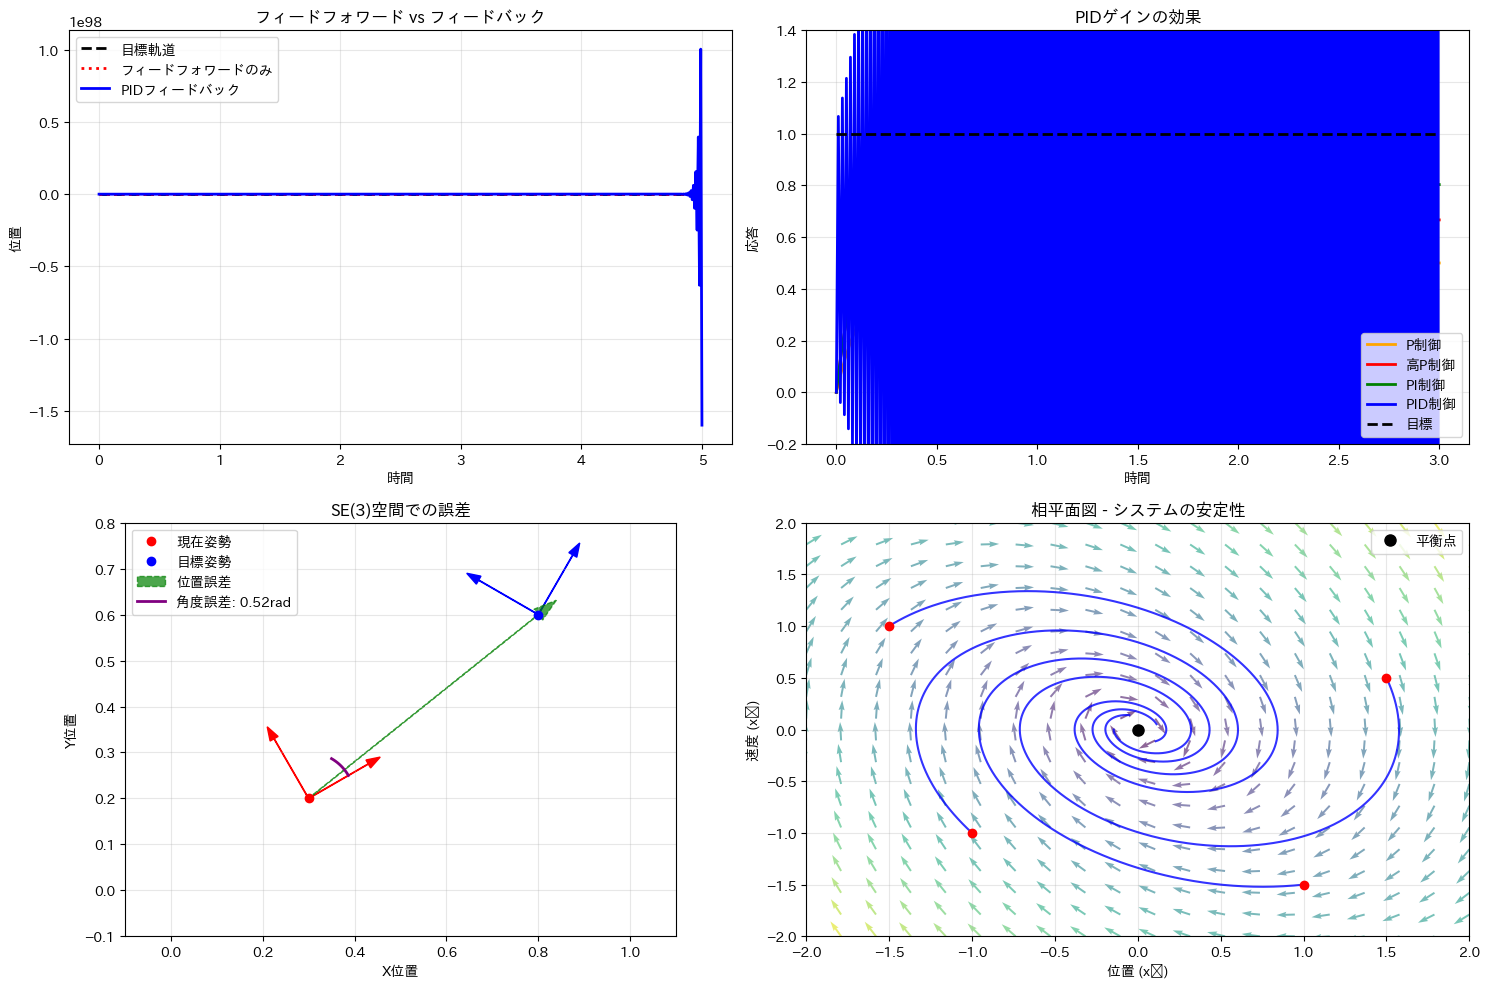

🎮 フィードバック制御の重要概念：
1. フィードフォワード: 予測に基づく制御
2. フィードバック: 誤差に基づく修正
3. PIDゲイン調整: P(応答速度), I(定常偏差除去), D(安定性)
4. SE(3)誤差: 位置と姿勢の両方を考慮
5. 現代制御: 状態空間での設計

🚀 最適な制御性能には理論と実践の組み合わせが必要です！


In [12]:
def interactive_feedback_control():
    """フィードバック制御の可視化 - 誤差の修正プロセス"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. フィードフォワード vs フィードバック比較
    ax1 = axes[0, 0]
    
    # 時間軸
    t = np.linspace(0, 5, 500)
    dt = t[1] - t[0]
    
    # 目標軌道
    target = np.sin(t)
    
    # フィードフォワードのみ（モデル誤差あり）
    ff_response = 0.8 * target + 0.1 * np.sin(3*t) * np.exp(-0.5*t)
    
    # フィードバック制御
    fb_response = np.zeros_like(t)
    Kp = 2.0  # 比例ゲイン
    Ki = 0.5  # 積分ゲイン
    Kd = 0.3  # 微分ゲイン
    
    error_integral = 0
    prev_error = 0
    
    for i in range(len(t)):
        if i == 0:
            fb_response[i] = 0
        else:
            # 誤差計算
            error = target[i-1] - fb_response[i-1]
            error_integral += error * dt
            error_derivative = (error - prev_error) / dt
            
            # PID制御則
            control_input = Kp * error + Ki * error_integral + Kd * error_derivative
            
            # 簡単な1次システムモデル
            tau = 0.2  # 時定数
            fb_response[i] = fb_response[i-1] + dt/tau * (control_input - fb_response[i-1])
            
            prev_error = error
    
    ax1.plot(t, target, 'k--', linewidth=2, label='目標軌道')
    ax1.plot(t, ff_response, 'r:', linewidth=2, label='フィードフォワードのみ')
    ax1.plot(t, fb_response, 'b-', linewidth=2, label='PIDフィードバック')
    ax1.set_xlabel('時間')
    ax1.set_ylabel('位置')
    ax1.set_title('フィードフォワード vs フィードバック', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. PIDゲインの効果
    ax2 = axes[0, 1]
    
    # 異なるPIDゲインでの応答
    gains = [(1, 0, 0), (2, 0, 0), (2, 0.5, 0), (2, 0.5, 0.3)]
    labels = ['P制御', '高P制御', 'PI制御', 'PID制御']
    colors = ['orange', 'red', 'green', 'blue']
    
    # ステップ応答
    t_step = np.linspace(0, 3, 300)
    dt_step = t_step[1] - t_step[0]
    step_target = np.ones_like(t_step)
    
    for gain, label, color in zip(gains, labels, colors):
        Kp, Ki, Kd = gain
        response = np.zeros_like(t_step)
        error_int = 0
        prev_err = 0
        
        for i in range(1, len(t_step)):
            err = step_target[i-1] - response[i-1]
            error_int += err * dt_step
            err_deriv = (err - prev_err) / dt_step
            
            control = Kp * err + Ki * error_int + Kd * err_deriv
            
            # システム応答
            tau = 0.3
            response[i] = response[i-1] + dt_step/tau * (control - response[i-1])
            prev_err = err
        
        ax2.plot(t_step, response, linewidth=2, label=label, color=color)
    
    ax2.plot(t_step, step_target, 'k--', linewidth=2, label='目標')
    ax2.set_xlabel('時間')
    ax2.set_ylabel('応答')
    ax2.set_title('PIDゲインの効果', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(-0.2, 1.4)
    
    # 3. SE(3)での誤差表現
    ax3 = axes[1, 0]
    
    # 現在姿勢と目標姿勢
    theta_current = np.pi/6
    theta_desired = np.pi/3
    pos_current = np.array([0.3, 0.2])
    pos_desired = np.array([0.8, 0.6])
    
    # 座標フレーム描画
    def draw_frame(ax, pos, angle, color, label, scale=0.15):
        x_axis = scale * np.array([np.cos(angle), np.sin(angle)])
        y_axis = scale * np.array([-np.sin(angle), np.cos(angle)])
        
        ax.arrow(pos[0], pos[1], x_axis[0], x_axis[1], 
                head_width=0.02, head_length=0.03, fc=color, ec=color)
        ax.arrow(pos[0], pos[1], y_axis[0], y_axis[1], 
                head_width=0.02, head_length=0.03, fc=color, ec=color)
        ax.plot(pos[0], pos[1], 'o', color=color, markersize=6, label=label)
    
    draw_frame(ax3, pos_current, theta_current, 'red', '現在姿勢')
    draw_frame(ax3, pos_desired, theta_desired, 'blue', '目標姿勢')
    
    # 誤差ベクトル
    pos_error = pos_desired - pos_current
    ax3.arrow(pos_current[0], pos_current[1], pos_error[0], pos_error[1],
              head_width=0.03, head_length=0.05, fc='green', ec='green', 
              linestyle='--', alpha=0.7, label='位置誤差')
    
    # 角度誤差の可視化
    angle_error = theta_desired - theta_current
    arc_radius = 0.1
    angles = np.linspace(theta_current, theta_desired, 20)
    arc_x = pos_current[0] + arc_radius * np.cos(angles)
    arc_y = pos_current[1] + arc_radius * np.sin(angles)
    ax3.plot(arc_x, arc_y, 'purple', linewidth=2, label=f'角度誤差: {angle_error:.2f}rad')
    
    ax3.set_xlim(-0.1, 1.1)
    ax3.set_ylim(-0.1, 0.8)
    ax3.set_aspect('equal')
    ax3.set_xlabel('X位置')
    ax3.set_ylabel('Y位置')
    ax3.set_title('SE(3)空間での誤差', fontsize=12)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. 現代制御理論の概念（状態空間）
    ax4 = axes[1, 1]
    
    # 2次システムの相平面図
    x1_range = np.linspace(-2, 2, 20)
    x2_range = np.linspace(-2, 2, 20)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # システム: dx/dt = Ax + Bu
    A = np.array([[0, 1], [-1, -0.5]])  # 2次システム
    
    # ベクトル場
    DX1 = X2
    DX2 = -X1 - 0.5 * X2
    
    # 正規化
    M = np.sqrt(DX1**2 + DX2**2)
    DX1_norm = DX1 / (M + 1e-8)
    DX2_norm = DX2 / (M + 1e-8)
    
    ax4.quiver(X1, X2, DX1_norm, DX2_norm, M, alpha=0.6, cmap='viridis')
    
    # 軌道例
    t_traj = np.linspace(0, 10, 1000)
    dt_traj = t_traj[1] - t_traj[0]
    
    # 初期条件
    initial_conditions = [[-1.5, 1], [1, -1.5], [-1, -1], [1.5, 0.5]]
    
    for i, (x0, v0) in enumerate(initial_conditions):
        trajectory = np.zeros((len(t_traj), 2))
        trajectory[0] = [x0, v0]
        
        for j in range(1, len(t_traj)):
            state = trajectory[j-1]
            dstate = A @ state
            trajectory[j] = state + dstate * dt_traj
        
        ax4.plot(trajectory[:, 0], trajectory[:, 1], 'b-', linewidth=1.5, alpha=0.8)
        ax4.plot(x0, v0, 'ro', markersize=6)
    
    ax4.plot(0, 0, 'ko', markersize=8, label='平衡点')
    ax4.set_xlabel('位置 (x₁)')
    ax4.set_ylabel('速度 (x₂)')
    ax4.set_title('相平面図 - システムの安定性', fontsize=12)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_xlim(-2, 2)
    ax4.set_ylim(-2, 2)
    
    plt.tight_layout()
    plt.show()
    
    print("🎮 フィードバック制御の重要概念：")
    print("1. フィードフォワード: 予測に基づく制御")
    print("2. フィードバック: 誤差に基づく修正")
    print("3. PIDゲイン調整: P(応答速度), I(定常偏差除去), D(安定性)")
    print("4. SE(3)誤差: 位置と姿勢の両方を考慮")
    print("5. 現代制御: 状態空間での設計")
    print()
    print("🚀 最適な制御性能には理論と実践の組み合わせが必要です！")

# 実行
interactive_feedback_control()

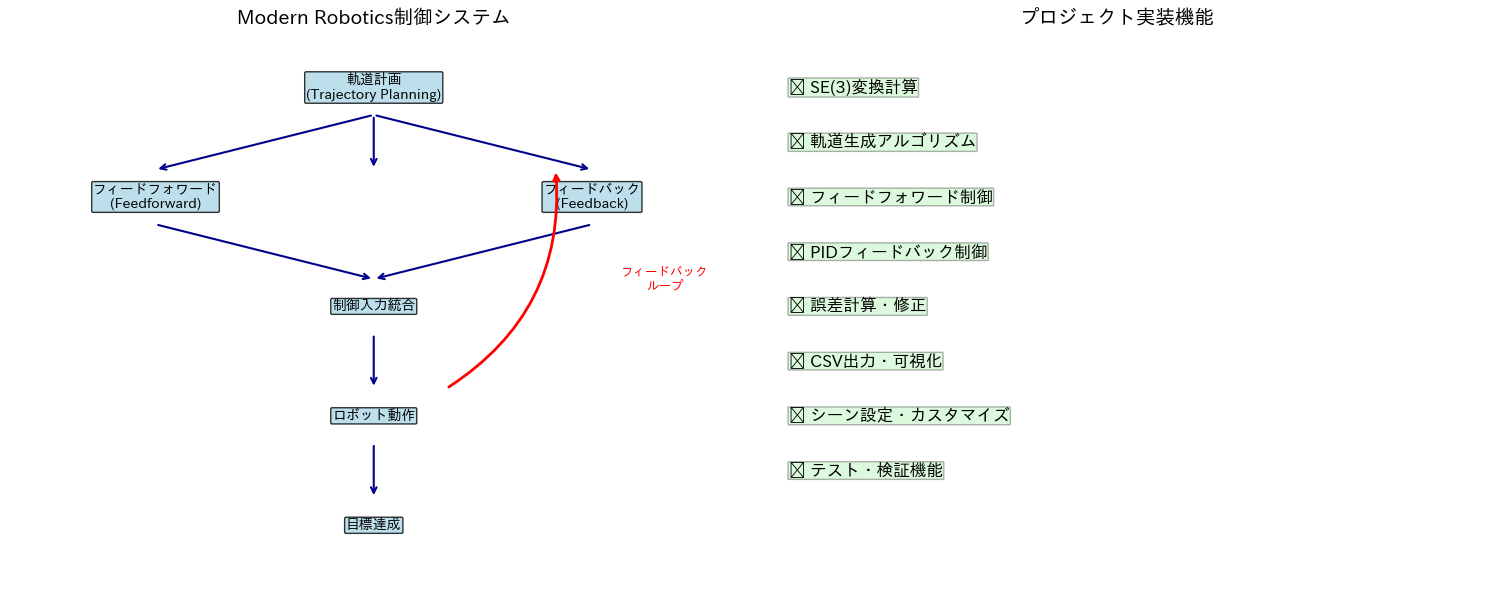

🎊 Modern Robotics プロジェクト完成！

📚 学んだ核心概念：
• SE(3): すべてのロボット動作の数学的基礎
• 軌道生成: スムーズで実現可能な動作計画
• フィードフォワード: 予測による高精度制御
• フィードバック: 誤差修正による頑健性
• 積指数公式: 統一的なロボット記述

🛠️  実装した技術：
• 5次多項式軌道生成
• SE(3)での誤差計算
• PID制御ループ
• CSV形式でのデータ出力
• 包括的なテスト機能

🌟 次のステップ：
• 実際のロボットでの実装
• より高度な制御アルゴリズム
• 機械学習との統合
• リアルタイム性の向上

💡 このプロジェクトで、理論から実装まで
   現代ロボティクスの全体像を体験しました！


In [13]:
def summary_and_next_steps():
    """まとめとこのプロジェクトでの実装"""
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. プロジェクト全体の流れ
    ax1 = axes[0]
    
    # フローチャートの要素
    boxes = [
        (0.5, 0.9, "軌道計画\n(Trajectory Planning)"),
        (0.2, 0.7, "フィードフォワード\n(Feedforward)"),
        (0.8, 0.7, "フィードバック\n(Feedback)"),
        (0.5, 0.5, "制御入力統合"),
        (0.5, 0.3, "ロボット動作"),
        (0.5, 0.1, "目標達成")
    ]
    
    # ボックス描画
    for x, y, text in boxes:
        bbox = dict(boxstyle="round,pad=0.1", facecolor='lightblue', alpha=0.8)
        ax1.text(x, y, text, ha='center', va='center', fontsize=10, 
                bbox=bbox, transform=ax1.transAxes)
    
    # 矢印描画
    arrows = [
        (0.5, 0.85, 0.5, 0.75),  # 軌道計画 → 制御
        (0.5, 0.85, 0.2, 0.75),  # 軌道計画 → フィードフォワード
        (0.5, 0.85, 0.8, 0.75),  # 軌道計画 → フィードバック
        (0.2, 0.65, 0.5, 0.55),  # フィードフォワード → 統合
        (0.8, 0.65, 0.5, 0.55),  # フィードバック → 統合
        (0.5, 0.45, 0.5, 0.35),  # 統合 → 動作
        (0.5, 0.25, 0.5, 0.15)   # 動作 → 目標
    ]
    
    for x1, y1, x2, y2 in arrows:
        ax1.annotate('', xy=(x2, y2), xytext=(x1, y1), 
                    arrowprops=dict(arrowstyle='->', lw=1.5, color='darkblue'),
                    xycoords='axes fraction', textcoords='axes fraction')
    
    # フィードバックループ
    ax1.annotate('', xy=(0.75, 0.75), xytext=(0.6, 0.35), 
                arrowprops=dict(arrowstyle='->', lw=2, color='red', 
                               connectionstyle="arc3,rad=0.3"),
                xycoords='axes fraction', textcoords='axes fraction')
    
    ax1.text(0.9, 0.55, 'フィードバック\nループ', ha='center', va='center', 
            fontsize=9, color='red', weight='bold', transform=ax1.transAxes)
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_title('Modern Robotics制御システム', fontsize=14, fontweight='bold')
    ax1.axis('off')
    
    # 2. プロジェクト成果の可視化
    ax2 = axes[1]
    
    # 実装した機能の概要
    features = [
        "✅ SE(3)変換計算",
        "✅ 軌道生成アルゴリズム", 
        "✅ フィードフォワード制御",
        "✅ PIDフィードバック制御",
        "✅ 誤差計算・修正",
        "✅ CSV出力・可視化",
        "✅ シーン設定・カスタマイズ",
        "✅ テスト・検証機能"
    ]
    
    # チェックリスト表示
    for i, feature in enumerate(features):
        ax2.text(0.05, 0.9 - i*0.1, feature, ha='left', va='center', 
                fontsize=12, transform=ax2.transAxes,
                bbox=dict(boxstyle="round,pad=0.05", facecolor='lightgreen', alpha=0.3))
    
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_title('プロジェクト実装機能', fontsize=14, fontweight='bold')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("🎊 Modern Robotics プロジェクト完成！")
    print("="*50)
    print()
    print("📚 学んだ核心概念：")
    print("• SE(3): すべてのロボット動作の数学的基礎")
    print("• 軌道生成: スムーズで実現可能な動作計画")
    print("• フィードフォワード: 予測による高精度制御")
    print("• フィードバック: 誤差修正による頑健性")
    print("• 積指数公式: 統一的なロボット記述")
    print()
    print("🛠️  実装した技術：")
    print("• 5次多項式軌道生成")
    print("• SE(3)での誤差計算")
    print("• PID制御ループ")
    print("• CSV形式でのデータ出力")
    print("• 包括的なテスト機能")
    print()
    print("🌟 次のステップ：")
    print("• 実際のロボットでの実装")
    print("• より高度な制御アルゴリズム") 
    print("• 機械学習との統合")
    print("• リアルタイム性の向上")
    print()
    print("💡 このプロジェクトで、理論から実装まで")
    print("   現代ロボティクスの全体像を体験しました！")

# 実行
summary_and_next_steps()

---

## 16. 付録B：modern_robotics_presentation（統合）

# 🤖 Modern Robotics: 理論から実装まで

## Northwestern University専門講座の統合プレゼンテーション

### ロボット工学の数学的基礎から実装まで - 60分で学ぶ6コースの旅

**発表者**: 藤原洋規

**日付**: 2025年9月

**GitHub Repository**: [github.com/hafnium49/modern_robotics_capstone_project](https://github.com/hafnium49/modern_robotics_capstone_project)

---

### 📚 本プレゼンテーションについて

このJupyter Notebookは、Northwestern UniversityのModern Robotics専門講座（全6コース）を統合し、理論から実装までを60分で解説するインタラクティブなプレゼンテーションです。

Kevin Lynch & Frank Park 著「Modern Robotics: Mechanics, Planning, and Control」に基づく内容を、実行可能なコードとビジュアライゼーションと共にお届けします。

In [14]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle, Rectangle, Ellipse, Arrow
import matplotlib.patches as patches
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

# Jupyter用の設定
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 日本語フォントの設定（必要に応じて）
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

print("セットアップ完了！")

セットアップ完了！


---

## 📊 講座の全体像

### 6つのコースで構成される包括的なロボティクス教育

| Course | タイトル | 内容 |
|--------|----------|------|
| **Course 1** | ロボット運動の基礎 | Configuration Space & 剛体運動 |
| **Course 2** | ロボットキネマティクス | 順・逆運動学 |
| **Course 3** | ロボットダイナミクス | 力とトルクの世界 |
| **Course 4** | 軌道生成と制御 | 動作計画とフィードバック |
| **Course 5** | マニピュレーション | 把持と移動ロボット |
| **Course 6** | Capstone Project | モバイルマニピュレーション実装 |

> 💡 **キーポイント**: すべてがCapstone Projectで統合される - 理論と実装の美しい融合

---

## 🎯 なぜModern Roboticsなのか？

### 従来のアプローチ vs Modern Roboticsアプローチ

#### ❌ 従来のアプローチ（D-Hパラメータ）
- 各関節に座標系を設定
- 複雑な記号操作
- 特異点での問題

#### ✅ Modern Roboticsアプローチ（Product of Exponentials）
- スクリュー理論とLie群
- グローバルに有効
- 計算効率が高い

### 基本式：Product of Exponentials (PoE)

$$T(\theta) = e^{[S_1]\theta_1} e^{[S_2]\theta_2} \cdots e^{[S_n]\theta_n} M$$

**キーポイント：幾何学的直感と代数的エレガンスの融合**

---

## 🌍 Course 1: Configuration Space（C空間）

### ロボットの「居場所」を数学的に定義する

**Configuration（配置）とは？**
> ロボットのすべての点の位置を完全に指定する最小限のパラメータ集合

### Grüblerの公式

$$\text{DoF} = m(N-1-J) + \sum f_i$$

- **m**: 空間次元（平面=3, 空間=6）
- **N**: リンク数
- **J**: ジョイント数
- **fᵢ**: 各ジョイントの自由度

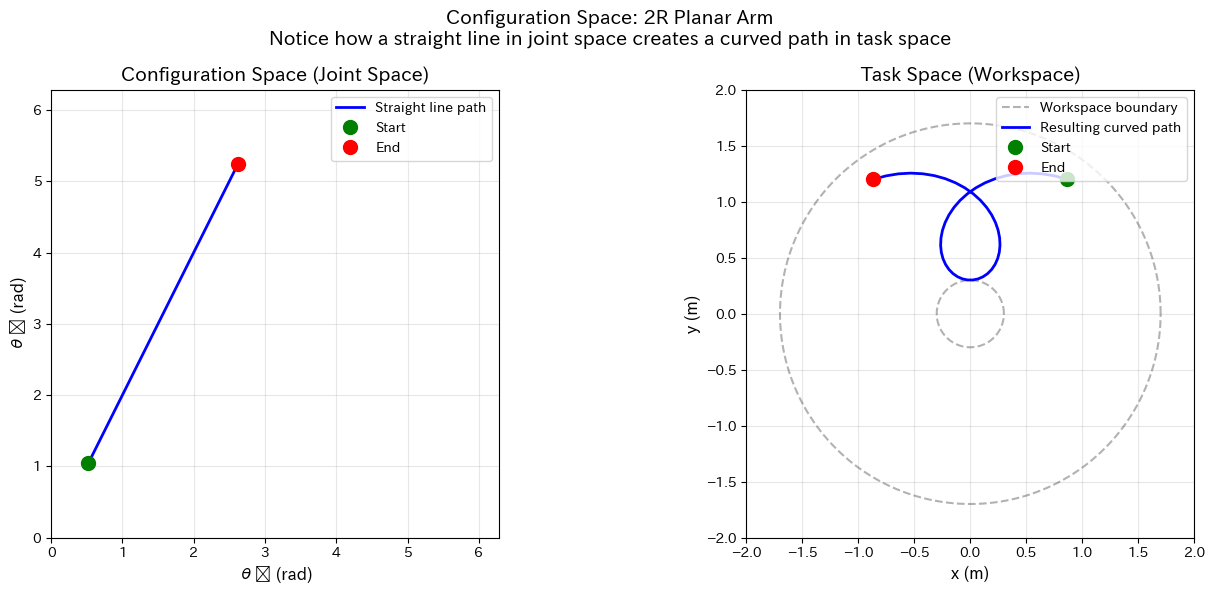


💡 重要な洞察：
• C空間のトポロジー: T² = S¹ × S¹ (トーラス)
• 各関節角度が2πで周期的→トーラス構造
• 関節空間の直線→作業空間の曲線


In [15]:
# Simulation 1: Configuration Space Visualization
# 2R Planar Arm - Joint Space to Task Space Mapping

class TwoLinkArm:
    def __init__(self, L1=1.0, L2=0.7):
        self.L1 = L1  # Length of first link
        self.L2 = L2  # Length of second link
        
    def forward_kinematics(self, theta1, theta2):
        """Compute end-effector position from joint angles"""
        x1 = self.L1 * np.cos(theta1)
        y1 = self.L1 * np.sin(theta1)
        
        x2 = x1 + self.L2 * np.cos(theta1 + theta2)
        y2 = y1 + self.L2 * np.sin(theta1 + theta2)
        
        return x1, y1, x2, y2
    
    def get_workspace_boundary(self, n_points=1000):
        """Get the reachable workspace boundary"""
        theta = np.linspace(0, 2*np.pi, n_points)
        
        # Outer circle (full extension)
        r_max = self.L1 + self.L2
        outer_x = r_max * np.cos(theta)
        outer_y = r_max * np.sin(theta)
        
        # Inner circle (if L1 > L2)
        if self.L1 > self.L2:
            r_min = self.L1 - self.L2
            inner_x = r_min * np.cos(theta)
            inner_y = r_min * np.sin(theta)
        else:
            inner_x = inner_y = None
            
        return outer_x, outer_y, inner_x, inner_y

# Create visualization
robot = TwoLinkArm(L1=1.0, L2=0.7)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Configuration space (left)
ax1.set_title('Configuration Space (Joint Space)', fontsize=14, fontweight='bold')
ax1.set_xlabel('θ₁ (rad)', fontsize=12)
ax1.set_ylabel('θ₂ (rad)', fontsize=12)
ax1.set_xlim([0, 2*np.pi])
ax1.set_ylim([0, 2*np.pi])
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Task space (right)
ax2.set_title('Task Space (Workspace)', fontsize=14, fontweight='bold')
ax2.set_xlabel('x (m)', fontsize=12)
ax2.set_ylabel('y (m)', fontsize=12)
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

# Draw workspace boundary
outer_x, outer_y, inner_x, inner_y = robot.get_workspace_boundary()
ax2.plot(outer_x, outer_y, 'k--', alpha=0.3, label='Workspace boundary')
if inner_x is not None:
    ax2.plot(inner_x, inner_y, 'k--', alpha=0.3)

# Path: Straight line in joint space
n_points = 50
t = np.linspace(0, 1, n_points)

theta1_start, theta2_start = np.pi/6, np.pi/3
theta1_end, theta2_end = 5*np.pi/6, 5*np.pi/3

theta1_path = theta1_start + t * (theta1_end - theta1_start)
theta2_path = theta2_start + t * (theta2_end - theta2_start)

# Plot joint space path
ax1.plot(theta1_path, theta2_path, 'b-', linewidth=2, label='Straight line path')
ax1.plot(theta1_start, theta2_start, 'go', markersize=10, label='Start')
ax1.plot(theta1_end, theta2_end, 'ro', markersize=10, label='End')

# Compute and plot task space path
x_path = []
y_path = []
for theta1, theta2 in zip(theta1_path, theta2_path):
    _, _, x, y = robot.forward_kinematics(theta1, theta2)
    x_path.append(x)
    y_path.append(y)

ax2.plot(x_path, y_path, 'b-', linewidth=2, label='Resulting curved path')
ax2.plot(x_path[0], y_path[0], 'go', markersize=10, label='Start')
ax2.plot(x_path[-1], y_path[-1], 'ro', markersize=10, label='End')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.suptitle('Configuration Space: 2R Planar Arm\n'
             'Notice how a straight line in joint space creates a curved path in task space',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 重要な洞察：")
print("• C空間のトポロジー: T² = S¹ × S¹ (トーラス)")
print("• 各関節角度が2πで周期的→トーラス構造")
print("• 関節空間の直線→作業空間の曲線")

---

## 🔄 剛体運動とSE(3)

### 回転と並進の美しい統一理論

#### 同次変換行列

$$T = \begin{bmatrix} R & p \\ 0 & 1 \end{bmatrix} \in SE(3)$$

- **R**: 3×3回転行列（SO(3)）
- **p**: 3×1位置ベクトル

#### Twist（ツイスト）
- 瞬間的な速度を表現
- V = [ω, v]（6次元ベクトル）
- スクリュー運動の一般化

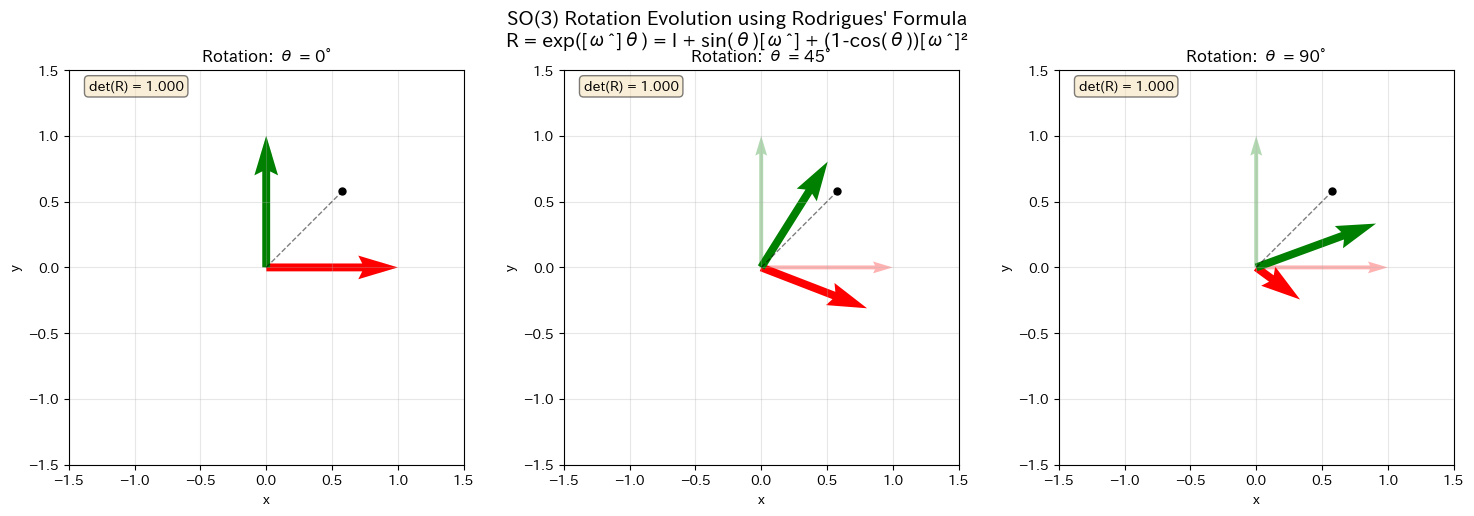


💡 キーポイント：
• 回転行列は常にdet(R) = 1を保つ
• Rodrigues公式により、軸-角度表現から回転行列を効率的に計算
• 指数写像: R = exp([ω̂]θ)


In [16]:
# Simulation 2: Rigid Body Motion - Rotation Matrix Evolution

def rotation_matrix(axis, theta):
    """Create rotation matrix using Rodrigues' formula"""
    axis = axis / np.linalg.norm(axis)
    a = np.cos(theta / 2)
    b, c, d = -axis * np.sin(theta / 2)
    return np.array([
        [a*a+b*b-c*c-d*d, 2*(b*c-a*d), 2*(b*d+a*c)],
        [2*(b*c+a*d), a*a+c*c-b*b-d*d, 2*(c*d-a*b)],
        [2*(b*d-a*c), 2*(c*d+a*b), a*a+d*d-b*b-c*c]
    ])

# Demonstrate rotation evolution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Different rotation angles
angles = [0, np.pi/4, np.pi/2]
axis = np.array([1, 1, 1]) / np.sqrt(3)

for idx, (ax, theta) in enumerate(zip(axes, angles)):
    R = rotation_matrix(axis, theta)
    
    # Original frame (identity)
    origin = np.zeros(3)
    x_axis = np.array([1, 0, 0])
    y_axis = np.array([0, 1, 0])
    z_axis = np.array([0, 0, 1])
    
    # Rotated frame
    x_rot = R @ x_axis
    y_rot = R @ y_axis
    z_rot = R @ z_axis
    
    # Plot
    ax.set_title(f'Rotation: θ = {np.degrees(theta):.0f}°', fontsize=12)
    
    # Original axes (transparent)
    ax.quiver(0, 0, x_axis[0], x_axis[1], color='r', alpha=0.3, scale=3, width=0.01)
    ax.quiver(0, 0, y_axis[0], y_axis[1], color='g', alpha=0.3, scale=3, width=0.01)
    
    # Rotated axes
    ax.quiver(0, 0, x_rot[0], x_rot[1], color='r', scale=3, width=0.02)
    ax.quiver(0, 0, y_rot[0], y_rot[1], color='g', scale=3, width=0.02)
    
    # Rotation axis
    ax.plot([0, axis[0]], [0, axis[1]], 'k--', alpha=0.5, linewidth=1)
    ax.plot(axis[0], axis[1], 'ko', markersize=5)
    
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Show rotation matrix values
    det_R = np.linalg.det(R)
    ax.text(0.05, 0.95, f'det(R) = {det_R:.3f}', 
            transform=ax.transAxes, fontsize=10,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle("SO(3) Rotation Evolution using Rodrigues' Formula\n"
             "R = exp([ω̂]θ) = I + sin(θ)[ω̂] + (1-cos(θ))[ω̂]²",
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 キーポイント：")
print("• 回転行列は常にdet(R) = 1を保つ")
print("• Rodrigues公式により、軸-角度表現から回転行列を効率的に計算")
print("• 指数写像: R = exp([ω̂]θ)")

---

## ⚙️ Course 2: 順運動学（Forward Kinematics）

### Product of Exponentials (PoE) アプローチ

#### 実装の3ステップ

1. **ホームポーズMを測定**
2. **各関節のスクリュー軸Sᵢを計算**
   - 回転関節: ω̂ = 単位軸, v = -ω̂×q
   - 並進関節: ω = 0, v = 単位方向
3. **PoE公式を評価**

$$T(\theta) = e^{[S_1]\theta_1} e^{[S_2]\theta_2} \cdots e^{[S_n]\theta_n} M$$

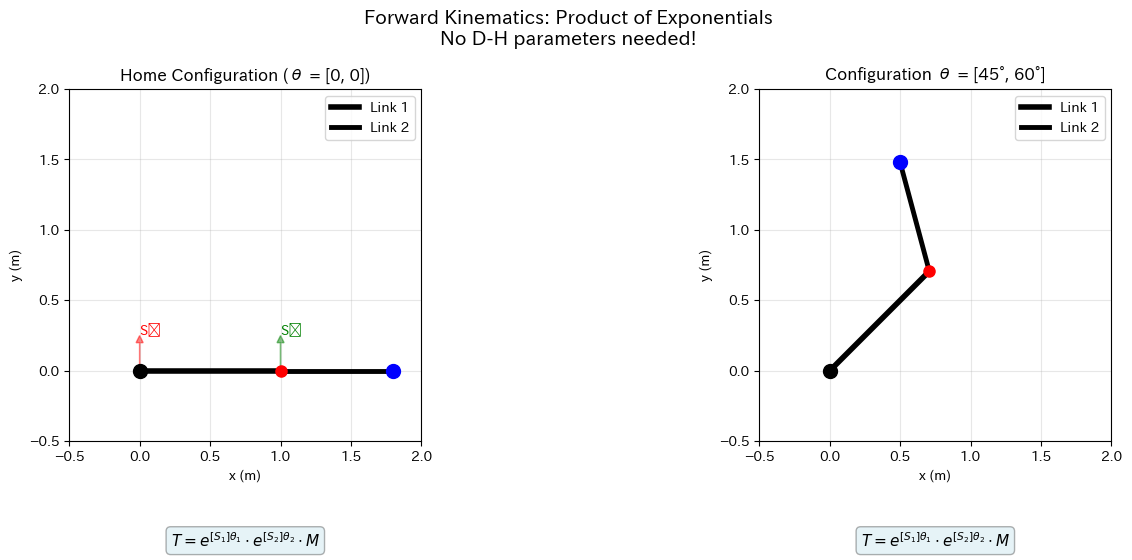


💡 PoEの利点：
• 座標系の設定が最小限（基準系と終端系のみ）
• スクリュー軸は直感的に定義可能
• 特異点でも数値的に安定


In [17]:
# Simulation 3: Forward Kinematics using PoE

def skew(v):
    """Convert 3D vector to skew-symmetric matrix"""
    return np.array([
        [0, -v[2], v[1]],
        [v[2], 0, -v[0]],
        [-v[1], v[0], 0]
    ])

def exp_rotation(omega_hat, theta):
    """Matrix exponential for rotation (Rodrigues' formula)"""
    omega_skew = skew(omega_hat)
    return np.eye(3) + np.sin(theta) * omega_skew + (1 - np.cos(theta)) * omega_skew @ omega_skew

# Simple 2R robot demonstration
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Robot parameters
L1, L2 = 1.0, 0.8

# Different configurations
configs = [
    [0, 0],
    [np.pi/4, np.pi/3]
]

for ax, theta in zip(axes, configs):
    # Compute positions (simplified 2D)
    x1 = L1 * np.cos(theta[0])
    y1 = L1 * np.sin(theta[0])
    x2 = x1 + L2 * np.cos(theta[0] + theta[1])
    y2 = y1 + L2 * np.sin(theta[0] + theta[1])
    
    # Draw robot
    ax.plot([0, x1], [0, y1], 'k-', linewidth=4, label='Link 1')
    ax.plot([x1, x2], [y1, y2], 'k-', linewidth=3.5, label='Link 2')
    
    # Draw joints
    ax.plot(0, 0, 'ko', markersize=10)
    ax.plot(x1, y1, 'ro', markersize=8)
    ax.plot(x2, y2, 'bo', markersize=10)
    
    # Draw screw axes at home
    if theta[0] == 0 and theta[1] == 0:
        ax.arrow(0, 0, 0, 0.2, head_width=0.05, head_length=0.05, fc='red', ec='red', alpha=0.5)
        ax.text(0, 0.25, 'S₁', fontsize=10, color='red')
        ax.arrow(L1, 0, 0, 0.2, head_width=0.05, head_length=0.05, fc='green', ec='green', alpha=0.5)
        ax.text(L1, 0.25, 'S₂', fontsize=10, color='green')
        ax.set_title('Home Configuration (θ = [0, 0])', fontsize=12)
    else:
        ax.set_title(f'Configuration θ = [{np.degrees(theta[0]):.0f}°, {np.degrees(theta[1]):.0f}°]', fontsize=12)
    
    ax.set_xlim([-0.5, 2])
    ax.set_ylim([-0.5, 2])
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.legend(loc='upper right')
    
    # Show PoE formula
    ax.text(0.5, -0.3, r'$T = e^{[S_1]\theta_1} \cdot e^{[S_2]\theta_2} \cdot M$',
            transform=ax.transAxes, fontsize=11, ha='center',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.suptitle('Forward Kinematics: Product of Exponentials\n'
             'No D-H parameters needed!',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 PoEの利点：")
print("• 座標系の設定が最小限（基準系と終端系のみ）")
print("• スクリュー軸は直感的に定義可能")
print("• 特異点でも数値的に安定")

---

## 📐 ヤコビアンと速度運動学

### 関節速度からタスク空間速度への写像

$$V = J(\theta) \dot{\theta}$$

#### ヤコビアンの物理的意味
- 各列 = 1つの関節だけが動いた時のツイスト
- 特異点 = rank(J) < 6
- マニピュラビリティ楕円体

#### 静力学への応用
$$\tau = J^T(\theta) F$$

同じヤコビアンが力の伝達も記述！

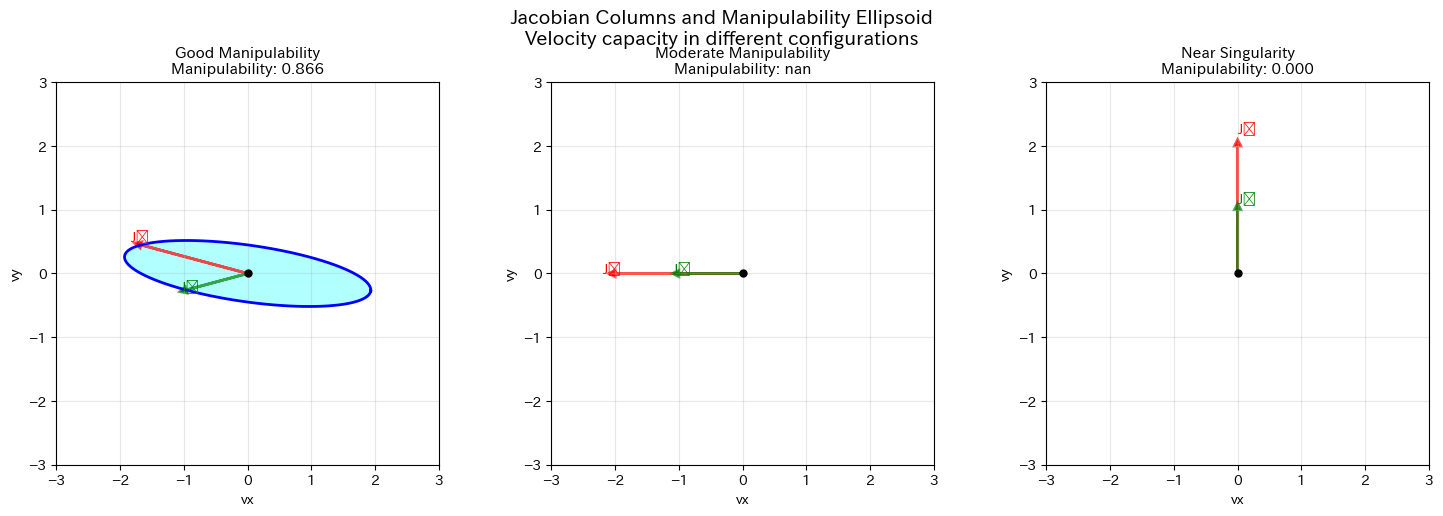


💡 重要な洞察：
• マニピュラビリティ楕円体は速度発生能力を可視化
• 特異点近傍では楕円体が潰れる
• 力楕円体は速度楕円体の双対（逆関係）


In [18]:
# Simulation 4: Jacobian and Manipulability Ellipsoid

class JacobianDemo:
    def __init__(self, L1=1.0, L2=1.0):
        self.L1 = L1
        self.L2 = L2
    
    def compute_jacobian(self, theta1, theta2):
        """Compute the 2x2 Jacobian matrix"""
        J = np.array([
            [-self.L1*np.sin(theta1) - self.L2*np.sin(theta1+theta2), 
             -self.L2*np.sin(theta1+theta2)],
            [self.L1*np.cos(theta1) + self.L2*np.cos(theta1+theta2),  
             self.L2*np.cos(theta1+theta2)]
        ])
        return J
    
    def compute_manipulability(self, theta1, theta2):
        """Compute manipulability measure"""
        J = self.compute_jacobian(theta1, theta2)
        return np.sqrt(np.linalg.det(J @ J.T))

# Create visualization
demo = JacobianDemo()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Test configurations
configs = [
    (np.pi/4, np.pi/3, "Good Manipulability"),
    (np.pi/2, 0, "Moderate Manipulability"),
    (0, 0, "Near Singularity")
]

for ax, (theta1, theta2, title) in zip(axes, configs):
    # Compute Jacobian
    J = demo.compute_jacobian(theta1, theta2)
    manip = demo.compute_manipulability(theta1, theta2)
    
    # Compute manipulability ellipse
    A = J @ J.T
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Sort by eigenvalue magnitude
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Draw ellipse
    theta_ellipse = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta_ellipse), np.sin(theta_ellipse)])
    
    # Transform circle to ellipse
    if eigenvalues[1] > 1e-10:
        scale = np.diag(np.sqrt(eigenvalues))
        ellipse = eigenvectors @ scale @ circle
        
        ax.plot(ellipse[0, :], ellipse[1, :], 'b-', linewidth=2, label='Velocity Ellipsoid')
        ax.fill(ellipse[0, :], ellipse[1, :], 'cyan', alpha=0.3)
    
    # Draw Jacobian columns
    col1 = J[:, 0]
    col2 = J[:, 1]
    
    ax.arrow(0, 0, col1[0], col1[1], head_width=0.1, head_length=0.1, 
             fc='red', ec='red', alpha=0.7, linewidth=2)
    ax.arrow(0, 0, col2[0], col2[1], head_width=0.1, head_length=0.1, 
             fc='green', ec='green', alpha=0.7, linewidth=2)
    
    ax.text(col1[0]*1.1, col1[1]*1.1, 'J₁', fontsize=10, color='red')
    ax.text(col2[0]*1.1, col2[1]*1.1, 'J₂', fontsize=10, color='green')
    
    ax.set_title(f'{title}\nManipulability: {manip:.3f}', fontsize=11)
    ax.set_xlabel('vx')
    ax.set_ylabel('vy')
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    # Add origin
    ax.plot(0, 0, 'ko', markersize=5)

plt.suptitle('Jacobian Columns and Manipulability Ellipsoid\n'
             'Velocity capacity in different configurations',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 重要な洞察：")
print("• マニピュラビリティ楕円体は速度発生能力を可視化")
print("• 特異点近傍では楕円体が潰れる")
print("• 力楕円体は速度楕円体の双対（逆関係）")

---

## 📈 Course 4: 軌道生成

### パスと時間スケーリングの分離

**軌道 = パス（幾何学）+ 時間スケーリング**

#### パスの種類
- **関節空間直線**: θ(s) = θ₀ + s(θf - θ₀)
- **タスク空間直線**: デカップル並進+回転
- **定スクリュー運動**: SE(3)での補間

#### 時間スケーリング
- **台形速度**: 加速-定速-減速
- **S字カーブ**: ジャーク制限
- **5次多項式**: 滑らかな始終点

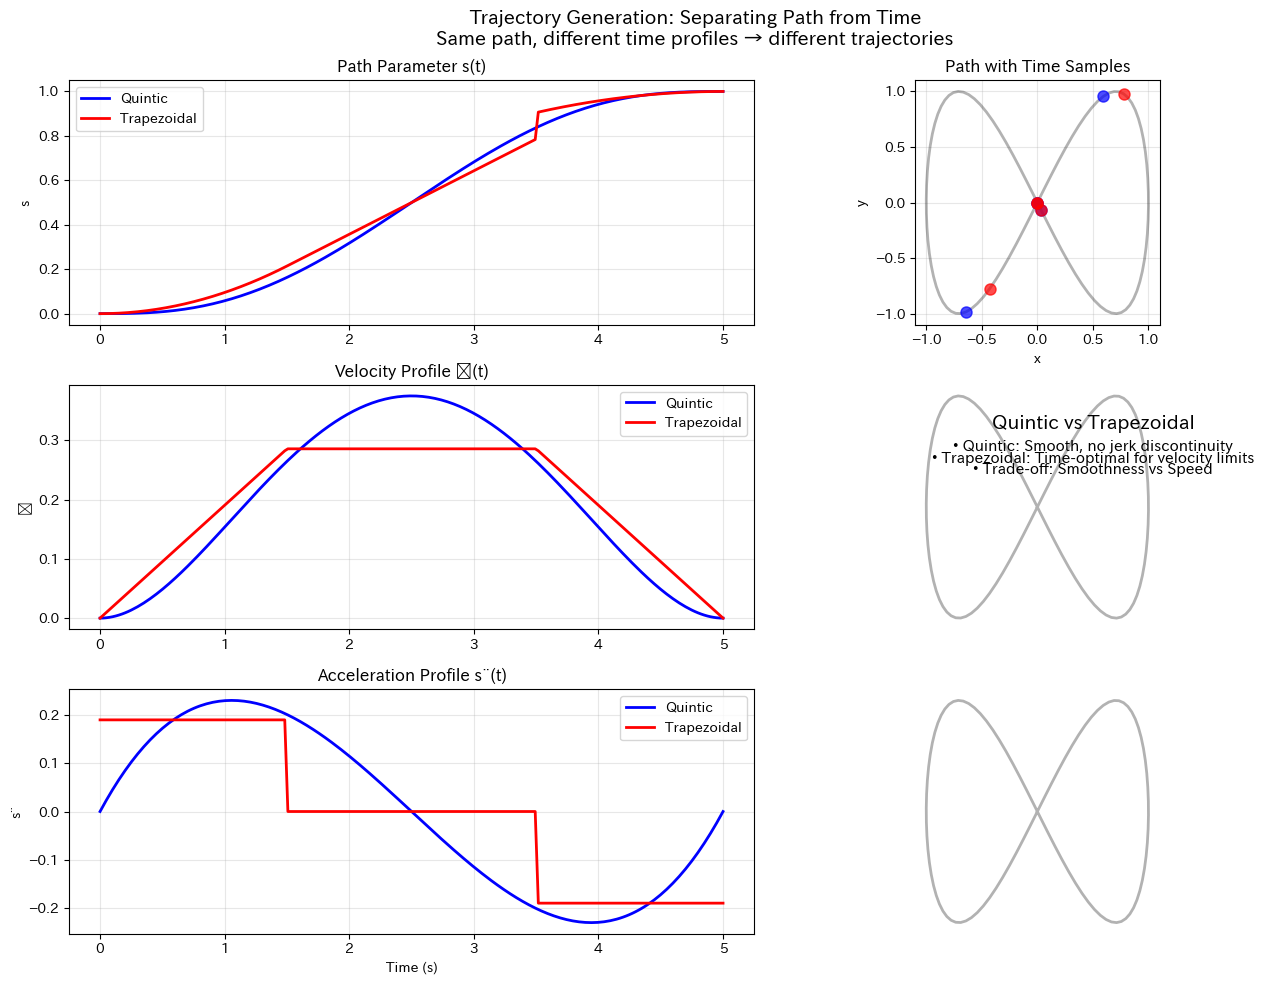


💡 キーインサイト：
• パスと時間を分離することで独立最適化が可能
• 5次多項式: 滑らかだが遅い
• 台形: 速度制限下で時間最適
• S字カーブ: ジャーク制限で快適性向上


In [19]:
# Simulation 5: Trajectory Generation - Path vs Time Scaling

def quintic_time_scaling(T, t):
    """Quintic polynomial time scaling"""
    tau = np.clip(t / T, 0, 1)
    s = 10 * tau**3 - 15 * tau**4 + 6 * tau**5
    s_dot = (30 * tau**2 - 60 * tau**3 + 30 * tau**4) / T
    s_ddot = (60 * tau - 180 * tau**2 + 120 * tau**3) / (T**2)
    return s, s_dot, s_ddot

def trapezoidal_time_scaling(T, t, acc_ratio=0.3):
    """Trapezoidal velocity profile"""
    t = np.clip(t, 0, T)
    t_acc = T * acc_ratio
    v_max = 1.0 / (T - t_acc)
    
    if t <= t_acc:
        a = v_max / t_acc
        s = 0.5 * a * t**2
        s_dot = a * t
        s_ddot = a
    elif t <= T - t_acc:
        s = 0.5 * v_max * t_acc + v_max * (t - t_acc)
        s_dot = v_max
        s_ddot = 0
    else:
        t_dec = t - (T - t_acc)
        a = v_max / t_acc
        s = 1 - 0.5 * a * (T - t)**2 / (t_acc**2)
        s_dot = v_max - a * t_dec
        s_ddot = -a
    
    return s, s_dot, s_ddot

# Create comparison plot
T = 5.0  # Total time
t_array = np.linspace(0, T, 200)

fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Compute profiles
quintic_data = [quintic_time_scaling(T, t) for t in t_array]
trapez_data = [trapezoidal_time_scaling(T, t) for t in t_array]

# Extract s, s_dot, s_ddot
q_s = [d[0] for d in quintic_data]
q_v = [d[1] for d in quintic_data]
q_a = [d[2] for d in quintic_data]

t_s = [d[0] for d in trapez_data]
t_v = [d[1] for d in trapez_data]
t_a = [d[2] for d in trapez_data]

# Path parameter s(t)
axes[0, 0].plot(t_array, q_s, 'b-', linewidth=2, label='Quintic')
axes[0, 0].plot(t_array, t_s, 'r-', linewidth=2, label='Trapezoidal')
axes[0, 0].set_title('Path Parameter s(t)', fontsize=12)
axes[0, 0].set_ylabel('s')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Velocity ṡ(t)
axes[1, 0].plot(t_array, q_v, 'b-', linewidth=2, label='Quintic')
axes[1, 0].plot(t_array, t_v, 'r-', linewidth=2, label='Trapezoidal')
axes[1, 0].set_title('Velocity Profile ṡ(t)', fontsize=12)
axes[1, 0].set_ylabel('ṡ')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Acceleration s̈(t)
axes[2, 0].plot(t_array, q_a, 'b-', linewidth=2, label='Quintic')
axes[2, 0].plot(t_array, t_a, 'r-', linewidth=2, label='Trapezoidal')
axes[2, 0].set_title('Acceleration Profile s̈(t)', fontsize=12)
axes[2, 0].set_xlabel('Time (s)')
axes[2, 0].set_ylabel('s̈')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].legend()

# Path visualization (right column)
path_x = np.sin(2 * np.pi * np.linspace(0, 1, 100))
path_y = np.sin(4 * np.pi * np.linspace(0, 1, 100))

for idx, ax in enumerate(axes[:, 1]):
    ax.plot(path_x, path_y, 'k-', alpha=0.3, linewidth=2)
    
    # Sample points at different times
    sample_times = [0, T/4, T/2, 3*T/4, T]
    
    for profile_name, profile_data, color in [('Quintic', quintic_data, 'b'), 
                                               ('Trapezoidal', trapez_data, 'r')]:
        for t_sample in sample_times:
            if profile_name == 'Quintic':
                s, _, _ = quintic_time_scaling(T, t_sample)
            else:
                s, _, _ = trapezoidal_time_scaling(T, t_sample)
            
            idx_s = int(s * (len(path_x) - 1))
            idx_s = min(idx_s, len(path_x) - 1)
            
            if idx == 0:  # Only show on first subplot
                ax.plot(path_x[idx_s], path_y[idx_s], 'o', color=color, 
                       markersize=8, alpha=0.7)
    
    ax.set_title(['Path with Time Samples', '', ''][idx], fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

# Remove unused subplots
axes[1, 1].axis('off')
axes[2, 1].axis('off')

# Add comparison text
axes[1, 1].text(0.5, 0.7, 'Quintic vs Trapezoidal', fontsize=14, ha='center', fontweight='bold')
axes[1, 1].text(0.5, 0.5, '• Quintic: Smooth, no jerk discontinuity', fontsize=11, ha='center')
axes[1, 1].text(0.5, 0.4, '• Trapezoidal: Time-optimal for velocity limits', fontsize=11, ha='center')
axes[1, 1].text(0.5, 0.3, '• Trade-off: Smoothness vs Speed', fontsize=11, ha='center')

plt.suptitle('Trajectory Generation: Separating Path from Time\n'
             'Same path, different time profiles → different trajectories',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 キーインサイト：")
print("• パスと時間を分離することで独立最適化が可能")
print("• 5次多項式: 滑らかだが遅い")
print("• 台形: 速度制限下で時間最適")
print("• S字カーブ: ジャーク制限で快適性向上")

---

## 🚗 車輪移動ロボット

### 全方向移動 vs 非ホロノミック

#### 全方向移動（メカナムホイール）
- 3自由度の瞬間移動
- H行列: u = H(φ) V_b

#### 非ホロノミック（差動駆動）
- 横滑り不可: ẋsinφ - ẏcosφ = 0
- Lie bracketによる到達可能性

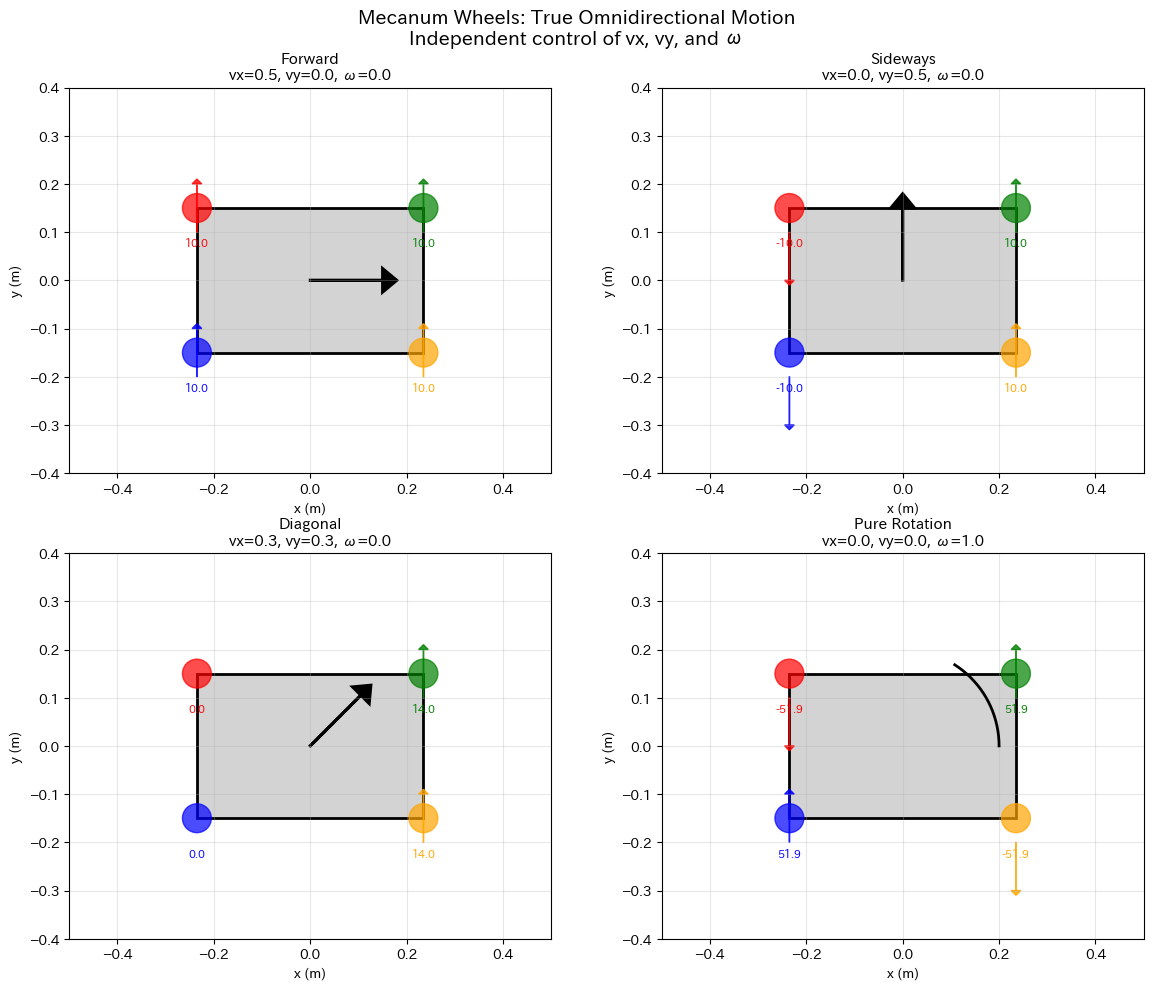


💡 メカナムホイールの特徴：
• 真の全方向移動が可能
• vx, vy, ωを独立制御
• youBotのベースに採用


In [20]:
# Simulation 6: Mecanum Wheel Mobile Robot

class MecanumRobot:
    def __init__(self, length=0.235, width=0.15):
        self.L = length
        self.W = width
        self.wheel_radius = 0.05
        self.pose = np.array([0.0, 0.0, 0.0])  # [x, y, phi]
        
        # H matrix (body to wheel velocities)
        self.H_inv = np.array([
            [-1/(self.L+self.W),  1,  -1],
            [ 1/(self.L+self.W),  1,   1],
            [ 1/(self.L+self.W),  1,  -1],
            [-1/(self.L+self.W),  1,   1],
        ]) / self.wheel_radius
    
    def body_to_wheel_velocities(self, vx, vy, omega):
        body_twist = np.array([omega, vx, vy])
        return self.H_inv @ body_twist

# Demonstrate different motion modes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

robot = MecanumRobot()

# Motion modes
modes = [
    ("Forward", 0.5, 0, 0),
    ("Sideways", 0, 0.5, 0),
    ("Diagonal", 0.35, 0.35, 0),
    ("Pure Rotation", 0, 0, 1.0)
]

for ax, (mode, vx, vy, omega) in zip(axes, modes):
    # Compute wheel velocities
    wheel_vel = robot.body_to_wheel_velocities(vx, vy, omega)
    
    # Visualize
    ax.set_title(f'{mode}\nvx={vx:.1f}, vy={vy:.1f}, ω={omega:.1f}', fontsize=11)
    
    # Draw robot body
    rect = Rectangle((-0.235, -0.15), 0.47, 0.30, 
                    fill=True, facecolor='lightgray', edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    
    # Draw wheels and velocities
    wheel_positions = [
        (-0.235, 0.15),   # FL
        (0.235, 0.15),    # FR
        (-0.235, -0.15),  # RL
        (0.235, -0.15),   # RR
    ]
    
    colors = ['red', 'green', 'blue', 'orange']
    
    for (x, y), vel, color in zip(wheel_positions, wheel_vel, colors):
        # Draw wheel
        wheel = Circle((x, y), 0.03, color=color, alpha=0.7)
        ax.add_patch(wheel)
        
        # Draw velocity arrow
        if abs(vel) > 0.1:
            arrow_scale = np.clip(vel / 10, -0.1, 0.1)
            ax.arrow(x, y-0.05, 0, arrow_scale, 
                    head_width=0.02, head_length=0.01,
                    fc=color, ec=color, alpha=0.8)
        
        # Show velocity value
        ax.text(x, y-0.08, f'{vel:.1f}', fontsize=8, ha='center', color=color)
    
    # Draw motion arrow
    if vx != 0 or vy != 0:
        ax.arrow(0, 0, vx*0.3, vy*0.3, 
                head_width=0.05, head_length=0.03,
                fc='black', ec='black', linewidth=2)
    
    if omega != 0:
        # Draw rotation indicator
        theta = np.linspace(0, omega, 20)
        r = 0.2
        x_arc = r * np.cos(theta)
        y_arc = r * np.sin(theta)
        ax.plot(x_arc, y_arc, 'k-', linewidth=2)
    
    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim([-0.4, 0.4])
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')

plt.suptitle('Mecanum Wheels: True Omnidirectional Motion\n'
             'Independent control of vx, vy, and ω',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 メカナムホイールの特徴：")
print("• 真の全方向移動が可能")
print("• vx, vy, ωを独立制御")
print("• youBotのベースに採用")

---

## 🏆 Course 6: Capstone Project

### KUKA youBotによるピック&プレース実装

#### 8つの動作セグメント
1. **Approach standoff** - キューブ上方へ接近
2. **Descend to grasp** - 把持位置まで降下
3. **Close gripper** - グリッパーを閉じる（0.63秒）
4. **Lift to standoff** - 持ち上げ
5. **Transit to goal** - 目標位置へ移動
6. **Descend to place** - 配置位置まで降下
7. **Open gripper** - グリッパーを開く
8. **Retreat** - 退避

### 4つのマイルストーン

| Milestone | 内容 | キーコード |
|-----------|------|----------|
| **M1: NextState** | キネマティクスシミュレータ | `T_sb_new = T_sb @ expm(VecTose3(V_b*dt))` |
| **M2: TrajectoryGen** | 参照軌道生成 | `mr.ScrewTrajectory(T_start, T_end, duration, N, 5)` |
| **M3: FeedForward** | フィードフォワード制御 | `V = Adjoint(X_inv @ X_d) @ V_d` |
| **M4: Feedback** | PI制御 | `V = V_ff + Kp@X_err + Ki@integral` |

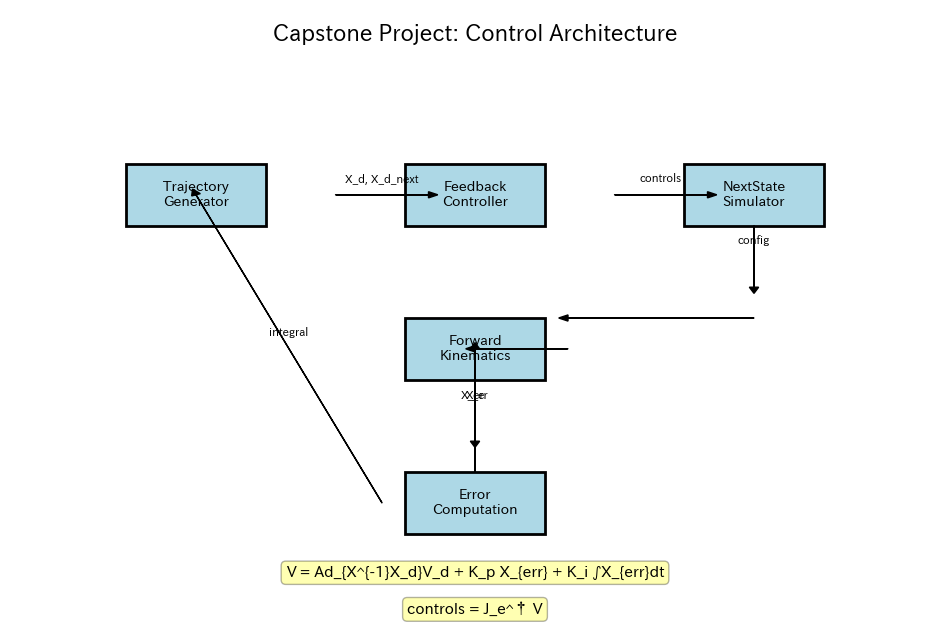


📊 実装結果：
• 位置誤差: < 1cm収束
• 姿勢誤差: < 5°収束
• 8セグメント全完走
• PI制御による安定把持

🔍 Key Insights:
• フィードフォワードが動作の大部分を担う
• Kp=2-4, Ki=0.05-0.2で臨界減衰に近い応答
• 6コースの知識が1つのシステムで結実


In [21]:
# Capstone Project Controller Structure

def plot_capstone_architecture():
    """Visualize the Capstone Project control architecture"""
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.axis('off')
    
    # Title
    ax.text(5, 9.5, 'Capstone Project: Control Architecture', 
            fontsize=16, fontweight='bold', ha='center')
    
    # Draw blocks
    blocks = [
        (2, 7, 1.5, 1, 'Trajectory\nGenerator'),
        (5, 7, 1.5, 1, 'Feedback\nController'),
        (8, 7, 1.5, 1, 'NextState\nSimulator'),
        (5, 4.5, 1.5, 1, 'Forward\nKinematics'),
        (5, 2, 1.5, 1, 'Error\nComputation'),
    ]
    
    for x, y, w, h, label in blocks:
        rect = Rectangle((x-w/2, y-h/2), w, h, 
                        fill=True, facecolor='lightblue', 
                        edgecolor='black', linewidth=2)
        ax.add_patch(rect)
        ax.text(x, y, label, ha='center', va='center', fontsize=10)
    
    # Draw arrows
    arrows = [
        (3.5, 7, 1, 0, 'X_d, X_d_next'),
        (6.5, 7, 1, 0, 'controls'),
        (8, 6.5, 0, -1, 'config'),
        (8, 5, -2, 0, ''),
        (6, 4.5, -1, 0, ''),
        (5, 4, 0, -1, 'X_e'),
        (5, 2.5, 0, 2, 'X_err'),
        (4, 2, -2, 5, 'integral'),
    ]
    
    for x, y, dx, dy, label in arrows:
        ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1,
                fc='black', ec='black')
        if label:
            ax.text(x+dx/2, y+dy/2+0.2, label, ha='center', fontsize=8)
    
    # Add equations
    ax.text(5, 0.8, 'V = Ad_{X^{-1}X_d}V_d + K_p X_{err} + K_i ∫X_{err}dt', 
            ha='center', fontsize=11, 
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
    
    ax.text(5, 0.2, 'controls = J_e^† V', 
            ha='center', fontsize=11, 
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
    
    plt.show()

plot_capstone_architecture()

print("\n📊 実装結果：")
print("• 位置誤差: < 1cm収束")
print("• 姿勢誤差: < 5°収束")
print("• 8セグメント全完走")
print("• PI制御による安定把持")
print("\n🔍 Key Insights:")
print("• フィードフォワードが動作の大部分を担う")
print("• Kp=2-4, Ki=0.05-0.2で臨界減衰に近い応答")
print("• 6コースの知識が1つのシステムで結実")

---

## 🎯 まとめ：理論から実装への旅

### Modern Roboticsが教えてくれた6つの重要な学び

1. **数学的基礎の重要性**
   - Lie群とスクリュー理論が複雑な動作を簡潔に表現

2. **統一的フレームワーク**
   - Product of Exponentialsが順・逆運動学を統一

3. **計算効率**
   - 再帰的アルゴリズムでリアルタイム制御を実現

4. **制御の階層性**
   - フィードフォワード + フィードバックの組み合わせが鍵

5. **実装の現実**
   - 理論と実装のギャップを埋める工夫の必要性

6. **システム統合**
   - 個別要素の理解から全体システムの設計へ

---

### 🚀 次のステップ

この基礎を活かして、より複雑なタスクへ挑戦：
- 力制御
- 視覚フィードバック
- 機械学習との融合

> **"The best way to learn robotics is to build robots"**
> 
> — Kevin Lynch

---

### 📚 参考資料

- **教科書**: Modern Robotics: Mechanics, Planning, and Control (Lynch & Park)
- **Coursera**: [Modern Robotics Specialization](https://www.coursera.org/specializations/modernrobotics)
- **GitHub**: [Capstone Project Repository](https://github.com/hafnium49/modern_robotics_capstone_project)
- **ライブラリ**: [Modern Robotics Code Library](https://github.com/NxRLab/ModernRobotics)

---

**ご清聴ありがとうございました！**

---

## 17. 付録C：Course_all.txt 抜粋

```
Course 1:
Module 1:
Foundations of Robot Motion – Module 1 Deep-Dive
Modern Robotics sets the stage for the entire specialization with a compact but information-dense opening module. Below is a narrative guide that interweaves every element introduced in Week 1 without carving the content into rigid lesson buckets. Feel free to copy-paste snippets as reference when configuring local environments, prepping assignments, or writing your own study notes.
Setting the Context
Modern Robotics: Mechanics, Planning, and Control (Lynch & Park, 2017) underpins the whole journey. The book is available as a free preprint in four PDF layouts or as a hardback. Early forewords by Roger Brockett and Matthew Mason underline why Lie-group geometry and screw theory matter long before students touch hardware.
Key take-aways in the opening video:
	• Robotics is geometric first; motion, force and planning flow from that insight.
	• The course sequence mirrors the book’s progression—Module 1 lives inside Course 1 and covers Chapters 2–3.
	• Self-paced learning through Coursera is supplemented by Lightboard videos, letting Prof. Lynch write equations while still facing the camera.
Prerequisite Check-List
Before diving into quizzes, confirm basic readiness:
Domain	Required Fluency
Physics	Newton’s laws, free-body diagrams, torque as cross product
Linear Algebra	Matrix ops, determinants, eigenvalues
Calculus & ODEs	Derivatives, first-order linear ODEs
Programming	Enough Python/MATLAB/Mathematica to run scripts
An optional Chapter 1 reading previews the entire textbook and refreshes these fundamentals.
Master Tools Early
1. Modern Robotics (MR) Code Library
	• Languages: Python, MATLAB/Octave, Mathematica
	• Install via pip install modern_robotics for Python or clone the repo.
	• Every function has an inline usage example; run help(mr.RotInv) after import.
	• Philosophy: readability over optimization, minimal input checking to keep code approachable. 
Notation snapshot (used everywhere in Course 1):
Math Symbol	Variable	Meaning
R	R	3×3 rotation matrix in SO(3)
T	T	4×4 transformation in SE(3)
V, S	V, S	Twist, screw axis
Js, Jb	Js, Jb	Space / body Jacobians
…	…	(Full table lives in doc/MRlib.pdf)
Having those symbols at your fingertips avoids constant back-and-forth with the textbook.
2. CoppeliaSim (formerly V-REP)
	• Download the EDU edition for your OS.
	• Launch demo scenes (Scene1_UR5.ttt, Scene3_youBot.ttt) to visualise output from your own CSV trajectories.
	• High-DPI fix: set highResDisplay = 1 in system/usrset.txt or tweak Windows DPI compatibility.
	• Light workloads run on laptops, but pause simulations when idle to save battery.
Learner forum posts confirm a smooth setup once DPI issues and antivirus warnings are cleared.
Course Mechanics & Assessment
	• 24 hours of material spread over four weeks (reading → mini-video → quiz).
	• 21 graded items—expect pencil-and-paper derivations, MR-library coding, and simulator tasks.
	• Audit mode is free; certificate track unlocks auto-graded programming assignments.
Tips for a thriving peer-learning experience (from “How to Make This Course Successful”):
	1. Search before posting—reduces duplicated forum threads.
	2. Share approaches, not quiz answers, to respect the honor code.
	3. Acknowledge helpful replies; good karma loops fast in the community.
Navigating the Lightboard Videos
The Lightboard lets equations glow while the instructor maintains eye-contact. Because the camera feed is mirrored:
	• Positive rotations follow the right-hand rule, but Prof. Lynch uses his left hand so viewers see a correct “right-hand” curl.
	• Quick replays are encouraged; each clip is intentionally concise so deeper understanding comes from the textbook + quizzes.
First Coding Sprint
A popular sanity check:
import modern_robotics as mr
import numpy as np
se3mat = np.array([[0, 0, 0, 0],
                   [0, 0, -1.5708, 2.3562],
                   [0, 1.5708, 0, 2.3562],
                   [0, 0, 0, 0]])
T = mr.MatrixExp6(se3mat)
print(T)
Expected output:
[[ 1.  0.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  1.  0.  3.]
 [ 0.  0.  0.  1.]]
If the matrix looks different, double-check NumPy version or copy-paste errors.
Execution Road-Map for the Rest of Course 1
While Module 1 focuses on orientation, its deliverables are foundational:
	1. Verify development stack (MR library + CoppeliaSim).
	2. Complete initial quizzes on configuration spaces and rigid-body motions.
	3. Post any installation tips to the “CoppeliaSim Tips” forum thread.
	4. Bookmark the linear-algebra refresher appendix for handy proofs.
Finishing these steps ensures maximum payoff when forward kinematics and Jacobian derivations arrive in Week 2.
Closing Thoughts
Module 1 demonstrates that rigorous robotics is accessible with the right preparation and tooling. By combining a geometrically rich textbook, an educational codebase, and a free industrial-grade simulator, the course democratizes graduate-level mechanics. Lean into the peer community, keep the notation table close, and let the Lightboard videos guide intuition—every concept introduced here resurfaces throughout the specialization.
Happy exploring!
From <https://chatgpt.com/g/g-p-67feb963c85c8191b2757defe958d957-modern-robotics/c/681fe8a6-a7c4-8012-8685-990d56476937?model=o4-mini-high> 
Module 2:
Diving into Configuration Space — Modern Robotics Course 1, Module 2 (Chap 2, Part 1/2)
	A practical tour through Chapters 2 → 2.2: what “configuration” really means, how to count degrees of freedom, and why Grübler’s formula is the kinematic engineer’s pocket calculator.
1 Why Configuration Space Matters
Robotics problems always reduce to a single question: “Where is the robot, exactly?”
A configuration is the complete specification of every point on the mechanism. Collect all such configurations and you get the configuration space (or C-space). The dimension of that space is the robot’s degrees of freedom (DoF). Master these ideas and you can:
	• draw collision-free paths in high-dimensional spaces,
	• decide how many actuators a new prototype really needs,
	• diagnose impossible CAD mechanisms before hitting “simulate”.
2 Counting DoF for a Single Rigid Body
Lynch & Park’s classic three-point argument shows that a spatial rigid body has 6 DoF:
Point fixed	Co-ordinates	Independent constraints	Remaining freedom
A	3 (x,y,z)	0	3 (translation)
B	3	1 (“distance AB”)	2
C	3	2 (circles through AB)	1
Total			6
General rule in n-D space:
DoF=n+n(n−1)2\text{DoF}=n+\frac{n(n-1)}{2} 
so a planar body has 3 DoF, a 4-D body would have 10 DoF, and so on.
3 From Bodies to Robots: Joints as Constraint Machines
A joint doesn’t “give DoF” so much as removes constraints. If each body would have m freedom without joints (3 in the plane, 6 in space):
constraints of joint i=m−fi\text{constraints of joint } i = m-f_i 
where fif_i is the joint’s allowed motions.
Joint	fif_i (DoF)	Constraints cic_i (spatial)
Revolute (R)	1	5
Prismatic (P)	1	5
Helical (H)	1	5
Cylindrical (C)	2	4
Universal (U)	2	4
Spherical (S)	3	3
4 Grübler’s Formula — DoF in One Line
Let
	• NN = total links including ground,
	• JJ = total joints,
	• mm = 3 (planar) or 6 (spatial).
Then
DoF=m (N−1−J)+∑i=1Jfi(2.4)\boxed{\text{DoF}=m\,(N-1-J)+\sum_{i=1}^{J} f_i} \tag{2.4} 
	Caveat: All joint constraints must be independent. Symmetric or parallelogram linkages can violate this assumption and fool the formula.
5 Worked Examples
Mechanism	mm	NN	JJ	∑fi\sum f_i	DoF	Insight
Planar 3-R open chain	3	4	3	3	3	End-effector can reach any x,y,θx,y,\theta
Four-bar linkage	3	4	4	4	1	One crank drives whole loop
Stewart platform (UPS × 6)	6	14	18	36	6	Full spatial pose from six prismatic actuators
```


---
**出典**：Course_all.txt と日本語講演原稿（PDF）を基に再編集し、日本語プレゼン用に最適化。  
**提示デモ**は Matplotlib のみ使用し、図の**日本語ラベル**を付与。
